#Importing the various libraries

---



In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import re
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

from matplotlib import style
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
import plotly.express as px

# Algorithms for trees,random forest, naives bayes, k-fold validation
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz



import graphviz






#Reading the CSV file and Dataframe info

---



In [ ]:
matchData = pd.read_csv('matches_info.csv') #all 3 years
matchData2017=pd.DataFrame(matchData[:80]) #2017
matchData2018=pd.DataFrame(matchData[80:161]) #2018
matchData2019=pd.DataFrame(matchData[161:]) #2019

pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 120)
print('Raw Data:')
print(matchData.head())
print('\n\n')
print("Info about Data: ")
print('\n')
print(matchData.info())

#Each row represents a game with the stats for 10 different players, having 10 datapoints per row
#With 240 rows, we have 2400 datapoints

Raw Data:
   Unnamed: 0       team1       team2  team_lost_score  team_won_score  ...                        player5_team2  \
0           0    Astralis  Virtus.pro                1               2  ...  Jarosław 'pashaBiceps' Jarząbkowski   
1           1  Virtus.pro          SK                0               2  ...             Fernando 'fer' Alvarenga   
2           2    Astralis      fnatic                0               2  ...                Dennis 'dennis' Edman   
3           3        FaZe          SK                1               2  ...              Epitacio 'TACO' de Melo   
4           4  Virtus.pro       North                1               2  ...              Mathias 'MSL' Lauridsen   

  kd_player5_team2 adr_player5_team2 kast_player5_team2 rating_player5_team2  
0            53-65              67.2             67.00%                 0.87  
1            34-50              60.3             60.60%                 0.78  
2            28-47              55.5             58.90% 

# Data Preparation

---



In [ ]:
#Function to rearranging and extracting data and combining columns of desired variables
def rearrange(df):

  statData11=df[ list(df.loc[:,'player1_team1':'rating_player1_team1'])].copy()  #merging the columns for individual players
  statData11_transposed = statData11.T 
  statData11_transposed.index=['player','kd','adr','kast','rating']   #keeping the desired variables

  statData21=df[ list(df.loc[:,'player2_team1':'rating_player2_team1'])].copy()
  statData21_transposed = statData21.T 
  statData21_transposed.index=['player','kd','adr','kast','rating']

  statData31=df[ list(df.loc[:,'player3_team1':'rating_player3_team1'])].copy()
  statData31_transposed = statData31.T 
  statData31_transposed.index=['player','kd','adr','kast','rating']

  statData41=df[ list(df.loc[:,'player4_team1':'rating_player4_team1'])].copy()
  statData41_transposed = statData41.T 
  statData41_transposed.index=['player','kd','adr','kast','rating']

  statData51=df[ list(df.loc[:,'player5_team1':'rating_player5_team1'])].copy()
  statData51_transposed = statData51.T 
  statData51_transposed.index=['player','kd','adr','kast','rating']

  statData12=df[ list(df.loc[:,'player1_team2':'rating_player1_team2'])].copy()
  statData12_transposed = statData12.T 
  statData12_transposed.index=['player','kd','adr','kast','rating']

  statData22=df[ list(df.loc[:,'player2_team2':'rating_player2_team2'])].copy()
  statData22_transposed = statData22.T 
  statData22_transposed.index=['player','kd','adr','kast','rating']

  statData32=df[ list(df.loc[:,'player3_team2':'rating_player3_team2'])].copy()
  statData32_transposed = statData32.T 
  statData32_transposed.index=['player','kd','adr','kast','rating']

  statData42=df[ list(df.loc[:,'player4_team2':'rating_player4_team2'])].copy()
  statData42_transposed = statData42.T 
  statData42_transposed.index=['player','kd','adr','kast','rating']

  statData52=df[ list(df.loc[:,'player5_team2':'rating_player5_team2'])].copy()
  statData52_transposed = statData52.T 
  statData52_transposed.index=['player','kd','adr','kast','rating']

  #combine all the individual dataframe into 1 dataframe containing all the values and transpose to get the desired form
  result=pd.concat([statData11_transposed,statData21_transposed,statData31_transposed,statData41_transposed,statData51_transposed,statData12_transposed,statData22_transposed,statData32_transposed,statData42_transposed,statData52_transposed], axis=1, ignore_index=True)
  result=result.transpose() 

  return result





#Data Cleaning and Data Analysis 

---




In [ ]:

#Function to clean the data
def clean(df):
  
  #converting kd from x-y into a ratio in float in 3dp
  ratio=[]
  for i in range(len(df['kd'])):
    word=df['kd'][i].split('-')
    a=float(word[0])/float(word[1])
    a=round(a,3)
    ratio.append(a)
  df.insert(0, "kdr", ratio, True)
  df.drop(['kd'],axis=1,inplace=True)


  #converting adr from category to float in 3dp
  ratio=[]
  for i in range(len(df['adr'])):
    word=df['adr'][i]
    a=float(word)
    a=round(a,3)
    ratio.append(a)
  df.insert(1, "adr_c", ratio, True)
  df.drop(['adr'],axis=1,inplace=True)
  df.rename(columns={'adr_c': 'adr'}, inplace=True)


  #converting kast from x% into a ratio in float in 3dp
  ratio=[]
  for i in range(len(df['kast'])):
    word=df['kast'][i].rsplit('%')
    a=float(word[0])
    a=a/100
    a=round(a,3)
    ratio.append(a)
  df.insert(2, "kast_c", ratio, True)
  df.drop(['kast'],axis=1,inplace=True)
  df.rename(columns={'kast_c': 'kast'}, inplace=True)


  #converting rating from category to float in 3dp
  ratio=[]
  for i in range(len(df['rating'])):
    word=df['rating'][i]
    a=float(word)
    a=round(a,3)
    ratio.append(a)
  df.insert(4, "rating_c", ratio, True)
  df.drop(['rating'],axis=1,inplace=True)
  df.rename(columns={'rating_c': 'rating'}, inplace=True)

  #cleaning player name to only their gamer tag
  for i in range(len(df['kdr'])):
    word=df['player'][i]
    a=word.split("\'")
    df['player'][i] = df['player'][i].replace(df['player'][i],a[1])

  

  #rearrange the columns
  df = df.sort_values(by ='player')
  df.reset_index(drop=True, inplace=True)
  df=df[['player','kdr','adr','kast','rating']]
  #df=df.set_index('player')

  return df





In [ ]:


#Displaying data for 2017 after each function to visualize the dataframe
matchData2017=rearrange(matchData2017)
print('After rearranging:')
print(matchData2017)
matchData2017=clean(matchData2017)
print('\n\n')

print('Final data after rearranging and cleaning:')
print(matchData2017)


#Using the functions above to clean and rearrange the data the remaining 2 years
matchData2018=rearrange(matchData2018)
matchData2018=clean(matchData2018)

matchData2019=rearrange(matchData2019)
matchData2019=clean(matchData2019)




After rearranging:
                                  player     kd   adr    kast rating
0              Markus 'Kjaerbye' Kjærbye  73-54  95.2  77.30%   1.38
1                    Wiktor 'TaZ' Wojtas  52-39    72  72.70%   1.17
2              Peter 'dupreeh' Rasmussen  48-37  93.3  76.80%   1.38
3                 Fabien 'kioShiMa' Fiey  40-47    81  63.50%      1
4    Jarosław 'pashaBiceps' Jarząbkowski  71-46  91.7  68.80%   1.44
..                                   ...    ...   ...     ...    ...
795                Nikola 'LEGIJA' Ninić  12-14  59.3  66.70%   0.84
796                      Kevin 'HS' Tarn  13-17  55.4  62.10%   0.86
797                Pavel 'hutji' Lashkov   7-16  58.2  27.80%    0.4
798           Yegor 'markeloff' Markelov  15-20  65.2  67.90%   0.82
799     Christian 'loWel' Garcia Antoran  10-18  54.2  57.70%   0.64

[800 rows x 5 columns]



Final data after rearranging and cleaning:
      player    kdr    adr   kast  rating
0      ANGE1  0.850   68.5  0.783    0.95

Adding columns for Frequency and presence in Top 20

In [ ]:
#add column stating how many times did player play in the majors for that year
def add_freq(df): 
  df.groupby('player').count()
  df['freq']=df.groupby('player')['player'].transform('count')
  df=df[['player','kdr','adr','kast','freq','rating']]

  return df

md7=add_freq(matchData2017)
md8=add_freq(matchData2018)
md9=add_freq(matchData2019)

In [ ]:
top = pd.read_csv('top20.csv') #all 3 years
top2017=pd.DataFrame(top[:20]) #2017
top2018=pd.DataFrame(top[20:]) #2018
top2019=pd.DataFrame(top[40:]) #2019
topall=pd.DataFrame(top)

array17=top2017['player'].tolist()
array18=top2018['player'].tolist()
array19=top2019['player'].tolist()
arrayall=topall['player'].tolist()


def add_istop(df,array): #add column stating if player is top 20 of the year
  arr=[]
  for i in range(len(df['player'])):
    if df['player'][i] in array:
      arr.append(1)
    else:
      arr.append(0)
  df['isTop']=arr
  df=df[['player','kdr','adr','kast','rating','freq','isTop']]
  return df

md7=add_istop(md7,array17)
md8=add_istop(md8,array18)
md9=add_istop(md9,array19)

frame=[md7,md8,md9]

mdall=pd.concat(frame,ignore_index=True)


In [ ]:
# some info about the data
print("Number of unique players throughout all 3 years:", len(mdall['player'].unique()))
print('\n\n')

freq=mdall['player'].value_counts()
print("Players who play in the majors the most frequently: ")
print(freq)
print('\n\n')

print("Dataframe for all 3 years after adding columns:")
print(mdall)


Number of unique players throughout all 3 years: 183



Players who play in the majors the most frequently: 
device      38
gla1ve      38
Xyp9x       38
dupreeh     38
Zeus        36
            ..
kinqie       3
Krad         3
FugLy        3
Zero         3
Forester     3
Name: player, Length: 183, dtype: int64



Dataframe for all 3 years after adding columns:
      player    kdr    adr   kast  rating  freq  isTop
0      ANGE1  0.850   68.5  0.783    0.95     3      0
1      ANGE1  1.069  101.7  0.706    1.25     3      0
2      ANGE1  0.857   96.4  0.565    0.94     3      0
3      AdreN  0.500  104.4  0.773    1.81    11      1
4      AdreN  1.462   86.5  0.833    1.47    11      1
...      ...    ...    ...    ...     ...   ...    ...
2395  xseveN  0.400   46.0  0.905    0.97    11      0
2396    zews  0.579   64.1  0.667    0.74     4      0
2397    zews  0.833   57.0  0.536    0.77     4      0
2398    zews  0.375   40.0  0.450    0.37     4      0
2399    zews  0.359   47.3  0.

In [ ]:
def average(df): #Take the average of all the games a player has played to reduce variation
  name=[]
  average=[]
  count=0
  for i in range(len(df)-1):
    if df['player'][i] not in name: #first time player is seen
      name.append(df['player'][i])
    if df['player'][i+1] in name and i!=len(df)-2:
      df['kdr'][i+1]=(df['kdr'][i]+df['kdr'][i+1])
      df['adr'][i+1]=(df['adr'][i]+df['adr'][i+1])
      df['kast'][i+1]=(df['kast'][i]+df['kast'][i+1])
      df['rating'][i+1]=(df['rating'][i]+df['rating'][i+1])
      count+=1
      average.append(0)
    if df['player'][i+1] not in name and i!=len(df)-2: #last time player is seen
      df['kdr'][i]=round(df['kdr'][i]/(count+1),3)
      df['adr'][i]=round(df['adr'][i]/(count+1),3)
      df['kast'][i]=round(df['kast'][i]/(count+1),3)
      df['rating'][i]=round(df['rating'][i]/(count+1),3)
      average.append(1)
      count=0
    if i==len(df)-2: #edge case for last player
      count+=1
      df['kdr'][i+1]=round((df['kdr'][i]+df['kdr'][i+1])/(count+1),3)
      df['adr'][i+1]=round((df['adr'][i]+df['adr'][i+1])/(count+1),3)
      df['kast'][i+1]=round((df['kast'][i]+df['kast'][i+1])/(count+1),3)
      df['rating'][i+1]=round((df['rating'][i]+df['rating'][i+1])/(count+1),3)
      average.append(0)
      average.append(1)
     

  #returning the dataframe with average values for each player
  df['isavg']=average
  df = df[df.isavg != 0]
  df=df.drop(columns=['isavg'])
  df=df.reset_index(drop=True)
  return df




In [ ]:
#use the average function to take the average values for each year
print("Dataframe with multiple games for each player in 2017:")
print(md7)
print('\n\n')

md77=average(md7)
print("Dataframe with average value across all games for each player in 2017:")
print(md77)
print('\n\n')


md88=average(md8)
md99=average(md9)


md7=md7.drop(columns=['isavg'])
md8=md8.drop(columns=['isavg'])
md9=md9.drop(columns=['isavg'])

Dataframe with multiple games for each player in 2017:
      player    kdr    adr   kast  rating  freq  isTop
0      ANGE1  0.850   68.5  0.783    0.95     3      0
1      ANGE1  1.069  101.7  0.706    1.25     3      0
2      ANGE1  0.857   96.4  0.565    0.94     3      0
3      AdreN  0.500  104.4  0.773    1.81    11      1
4      AdreN  1.462   86.5  0.833    1.47    11      1
..       ...    ...    ...    ...     ...   ...    ...
795  znajder  1.080   83.3  0.750    1.13     5      0
796  znajder  0.412   36.3  0.263    0.40     5      0
797  znajder  0.500  100.9  0.909    1.44     5      0
798  znajder  0.750   67.6  0.720    0.86     5      0
799  znajder  1.176   65.8  0.625    0.97     5      0

[800 rows x 7 columns]



Dataframe with average value across all games for each player in 2017:
        player    kdr     adr   kast  rating  freq  isTop
0        ANGE1  0.925  88.867  0.685   1.047     3      0
1        AdreN  1.285  94.309  0.755   1.407    11      1
2        B1ad

In [ ]:
#The calculation for rating depends on the other variables 
#However rating alone does not determine if player is in the list of top 20
#As shown below, having a high rating alone does not make a player be in the list of top 20
print(md99.sort_values(by ='rating',ascending=False).head(40))

         player    kdr     adr   kast  rating  freq  isTop
65       device  1.186  85.800  0.755   1.358    13      1
35       Magisk  1.143  85.769  0.778   1.309    13      1
67   electronic  1.174  86.073  0.755   1.281    11      1
61     coldzera  1.177  89.450  0.736   1.275     6      0
53        ZywOo  1.141  83.680  0.745   1.267    10      1
50        Xyp9x  1.081  80.831  0.791   1.263    13      1
94       s1mple  1.168  78.091  0.786   1.249    11      1
27     Kjaerbye  1.343  88.900  0.706   1.235     4      0
8        Brehze  1.201  84.812  0.714   1.206     8      1
12        EliGE  1.221  86.680  0.684   1.193    10      1
95       sergej  0.869  83.064  0.726   1.188    11      1
72       flamie  1.123  83.136  0.743   1.185    11      0
56         apEX  1.104  82.450  0.723   1.184    10      0
66      dupreeh  1.132  77.277  0.740   1.176    13      1
55         allu  1.141  77.282  0.685   1.175    11      0
13    EspiranTo  1.123  82.800  0.691   1.170     5     

# Machine Learning Code

---










In [ ]:
def classify(df):
  X = df.drop(["isTop",'player'], axis=1)
  Y = df["isTop"]
  X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.30) #Randomly split train and test set 

  
  # Decision Tree using random split data
  dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
  dectree.fit(X_train, Y_train)                    # train the decision tree model
  
  # Predict Response corresponding to Predictors
  y_train_pred = dectree.predict(X_train)
  y_test_pred = dectree.predict(X_test)
  dectrain=dectree.score(X_train, Y_train)
  decpred= dectree.score(X_test, Y_test)
  print("Decision Tree Classification Accuracy:")
  print(round(dectrain,2,)*100, "%")
  print("Decision Tree Prediction Accuracy:")
  print(round(decpred,2,)*100, "%")
  
  # Plot the Confusion Matrix for Train and Test
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(Y_train, y_train_pred),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
  sb.heatmap(confusion_matrix(Y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
  
  # Plot the Decision Tree
  treedot = export_graphviz(dectree,                                      
                            feature_names = X_train.columns,               
                            out_file = None,                              
                            filled = True,                                
                            rounded = True,                               
                            special_characters = True)                    
  fig, ax = plt.subplots(figsize=(40, 12))
  out=plot_tree(dectree, 
            feature_names = X_train.columns,
            class_names = [str(x) for x in dectree.classes_],
            filled=True)
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor('black')
          arrow.set_linewidth(3)
  plt.show()
  
  #Plot the variable importance of Decision Tree
  importances = pd.DataFrame({'Variable':X.columns,'importance':np.round(dectree.feature_importances_,3)})
  importances = importances.sort_values('importance',ascending=False)
  fig = px.bar(importances, x='Variable', y='importance',
              hover_data=['importance'], color='importance',labels={'importance':'Weightage'},height=300,width=800)
  fig.show()

  


  #Gaussian Naive Bayes Classifier using the same random split train/test data set
  gaussian = GaussianNB()
  gaussian.fit(X_train, Y_train)
  

  # Predict Response corresponding to Predictors
  Y_train_pred = gaussian.predict(X_train)
  Y_pred = gaussian.predict(X_test)
  acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
  acc_gaussian1 = round(gaussian.score(X_test, Y_test) * 100, 2)
  print("Gaussian Naives Bayes Classification Accuracy:")
  print(round(acc_gaussian,2,), "%")
  print("Gaussian Naives Bayes Prediction Accuracy:")
  print(round(acc_gaussian1,2,), "%")
  print('\n')

  # Plot the Confusion Matrix for Train and Test
  print("     Training Confusion Matrix                       Prediction Confusion Matrix")
  f1, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
  sb.heatmap(confusion_matrix(Y_test, Y_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
  plt.show()



  #random forest classifier using the same random split train/test data set
  random_forest = RandomForestClassifier(n_estimators=10) #number of random tree
  random_forest.fit(X_train, Y_train)
  Y_train_pred = random_forest.predict(X_train)
  Y_pred = random_forest.predict(X_test)
  rfscore = round(random_forest.score(X_train, Y_train) * 100, 2)
  rfscore1 = round(random_forest.score(X_test, Y_test) * 100, 2)
  print("Random Forest Classification Accuracy:")
  print(round(rfscore,2,), "%")
  print("Random Forest Prediction Accuracy:")
  print(round(rfscore1,2,), "%")
  print('\n')
  print("     Training Confusion Matrix                       Prediction Confusion Matrix")
  f2, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
  sb.heatmap(confusion_matrix(Y_test, Y_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
  plt.show()
  importances = pd.DataFrame({'Variable':X.columns,'importance':np.round(random_forest.feature_importances_,3)})
  importances = importances.sort_values('importance',ascending=False)
  fig = px.bar(importances, x='Variable', y='importance',
              hover_data=['importance'], color='importance',labels={'importance':'Weightage'},height=300,width=800)
  fig.show()
  
  # Displaying the individial random_forest trees
  fig, axes = plt.subplots(1,10,figsize = (40,12)) #change according to number of estimators
  for i in range(10):    #change according to number of estimators
    
    tree1=plot_tree(random_forest.estimators_[i],
                  feature_names = X_train.columns, 
                  class_names=[str(x) for x in dectree.classes_],
                  filled = True,ax = axes[i]);
    axes[i].set_title('Estimator: ' + str(i))
    for o in tree1:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor('black')
          arrow.set_linewidth(3)
  plt.show()

  



  #random forest classifier with k-fold cross validation
  print("\n\n")
  print("Random forest with k-fold validation of data")
  rf = RandomForestClassifier(n_estimators=10) #change according to number of estimators
  scores = cross_val_score(rf, X, Y, cv=10, scoring = "accuracy") #Use data that have not been randomly split and split into 10 segments
  print("Accuracy of each fold:")
  for i in range(len(scores)):
    print(round(scores[i],3))
  print("Random Forest Using K-Fold validation mean Accuracy:")
  print(round(scores.mean()*100,2,), "%")
  print("Standard Deviation of Accuracy")
  print(round(scores.std()*100,2,), "%")
  

# Analysis of data

---



##Analysis using average values for 2017

Decision Tree Classification Accuracy:
96.0 %
Decision Tree Prediction Accuracy:
82.0 %


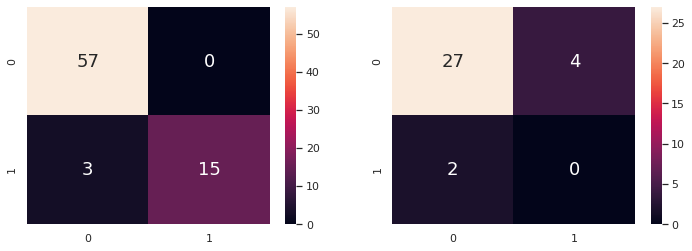

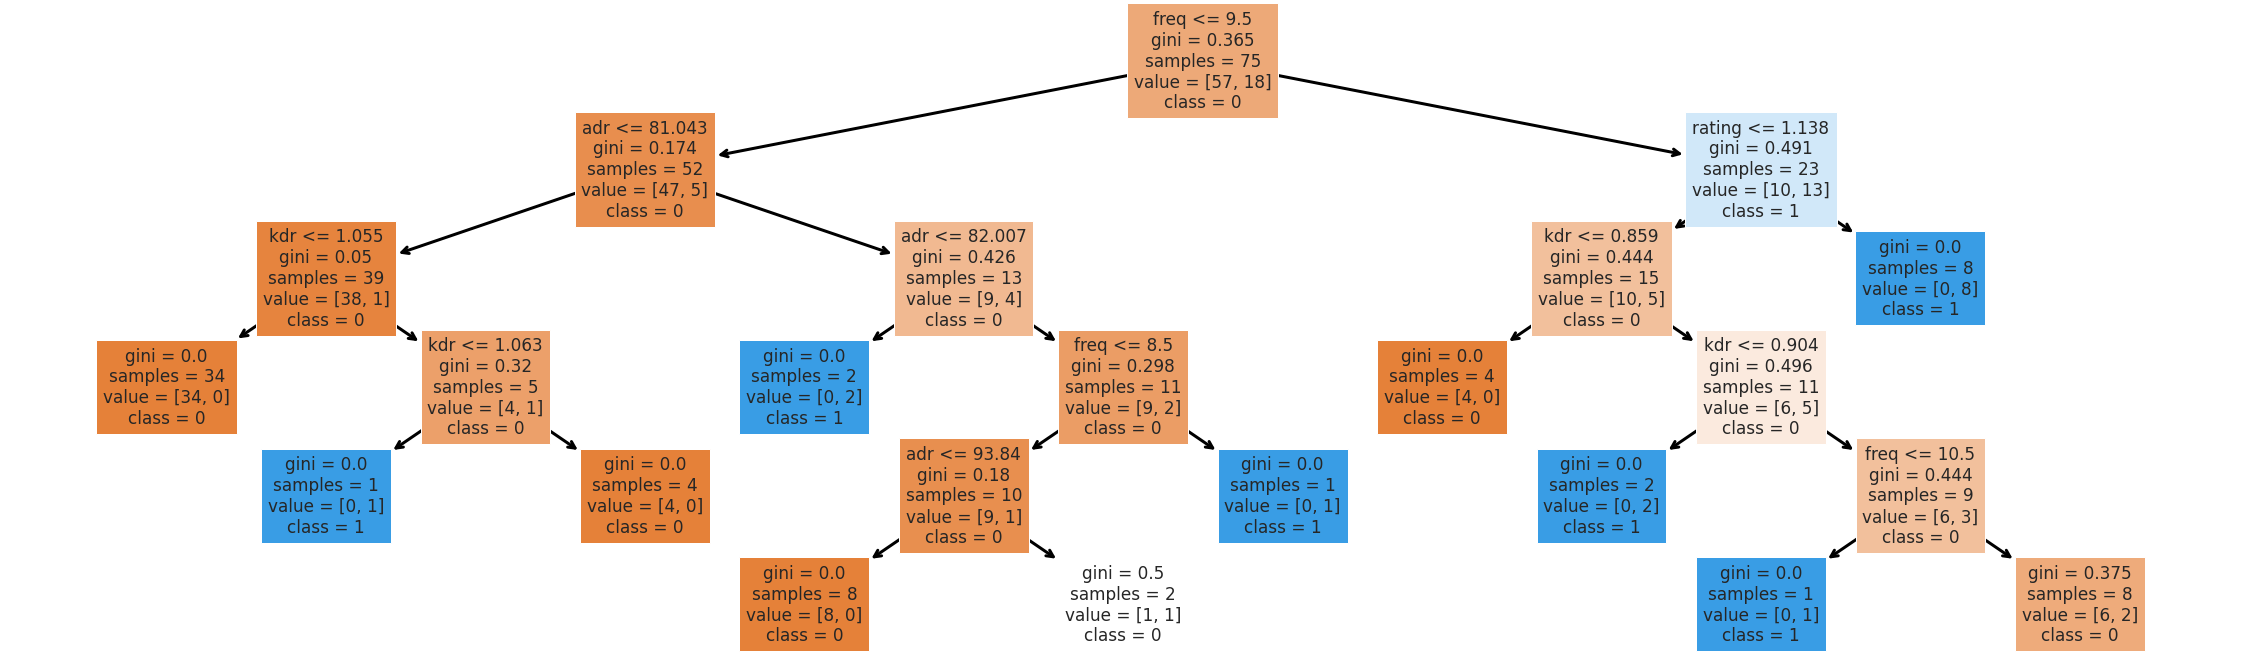

Gaussian Naives Bayes Classification Accuracy:
81.33 %
Gaussian Naives Bayes Prediction Accuracy:
63.64 %


     Training Confusion Matrix                       Prediction Confusion Matrix


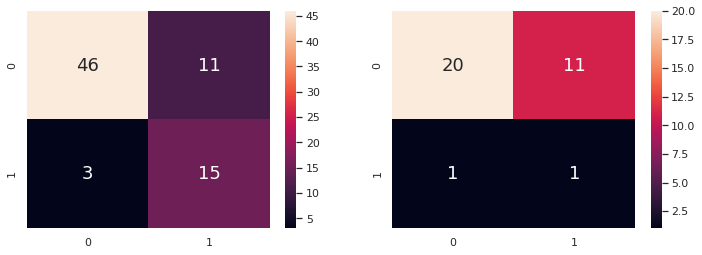

Random Forest Classification Accuracy:
96.0 %
Random Forest Prediction Accuracy:
93.94 %


     Training Confusion Matrix                       Prediction Confusion Matrix


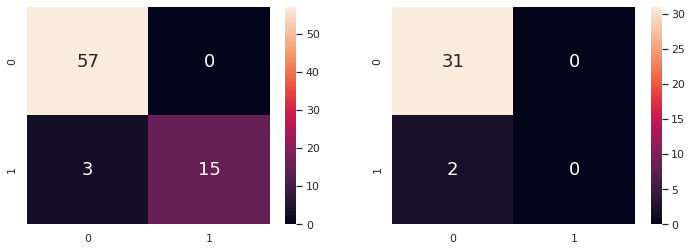

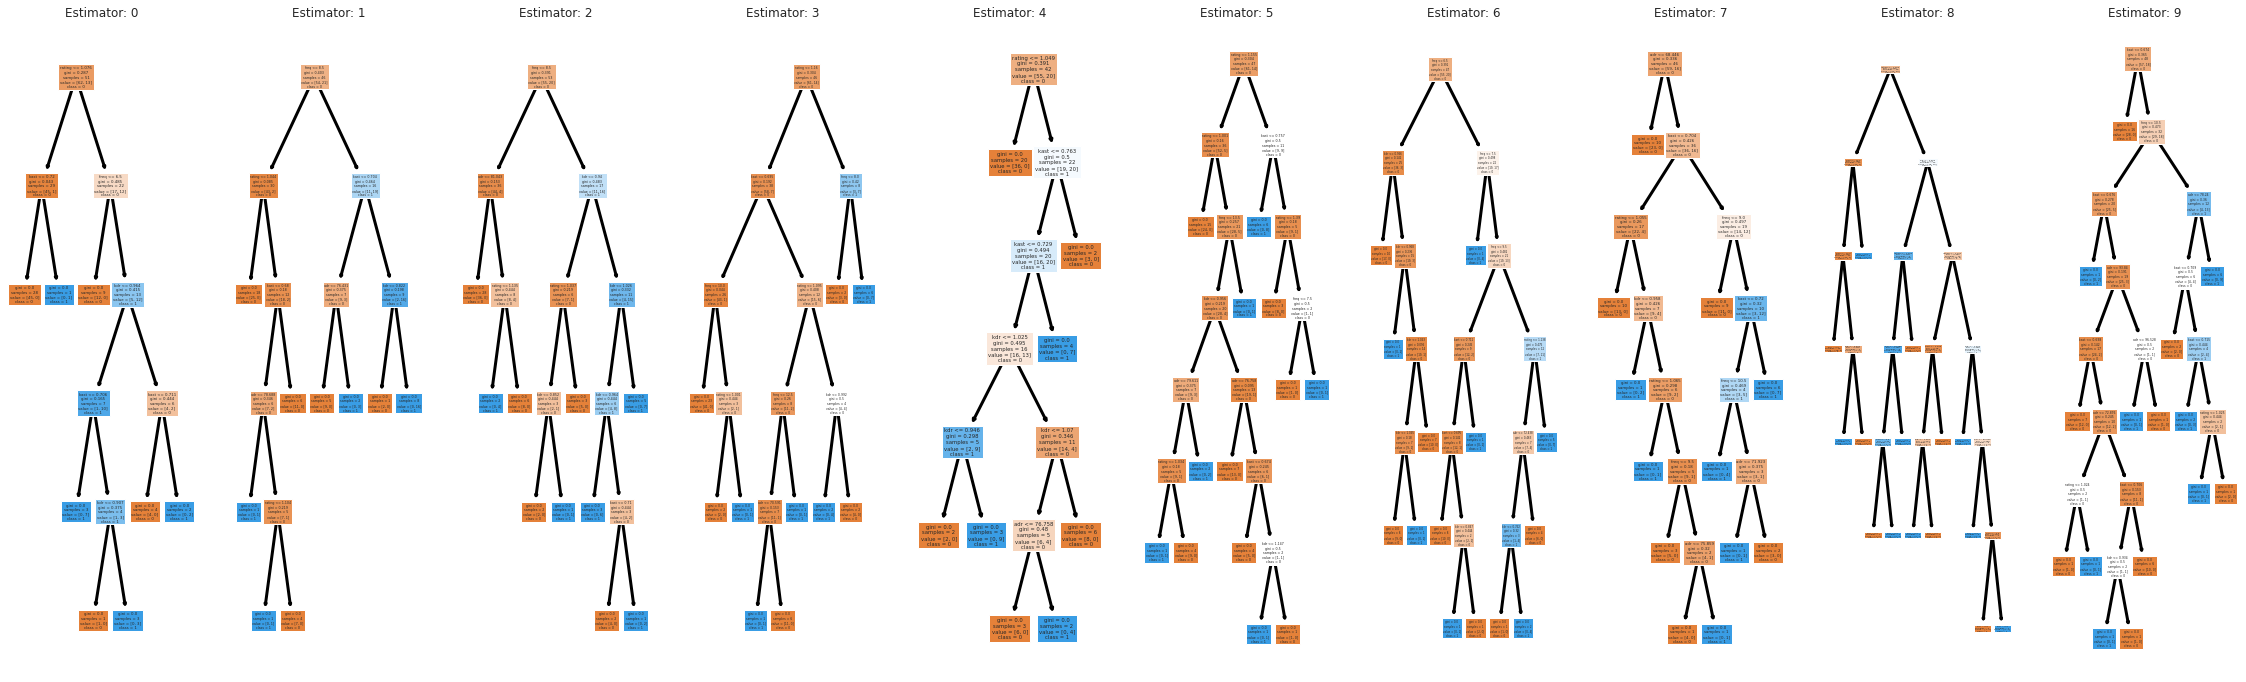




Random forest with k-fold validation of data
Accuracy of each fold:
0.909
0.727
0.818
0.909
0.818
0.818
0.818
0.818
0.8
0.8
Random Forest Using K-Fold validation mean Accuracy:
82.36 %
Standard Deviation of Accuracy
5.02 %
None


In [ ]:
print(classify(md77))

## Analysis using average values for 2018

---



Decision Tree Classification Accuracy:
99.0 %
Decision Tree Prediction Accuracy:
80.0 %


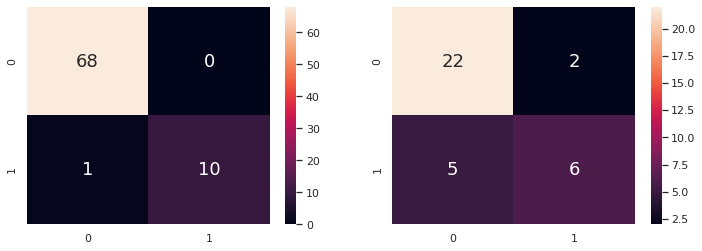

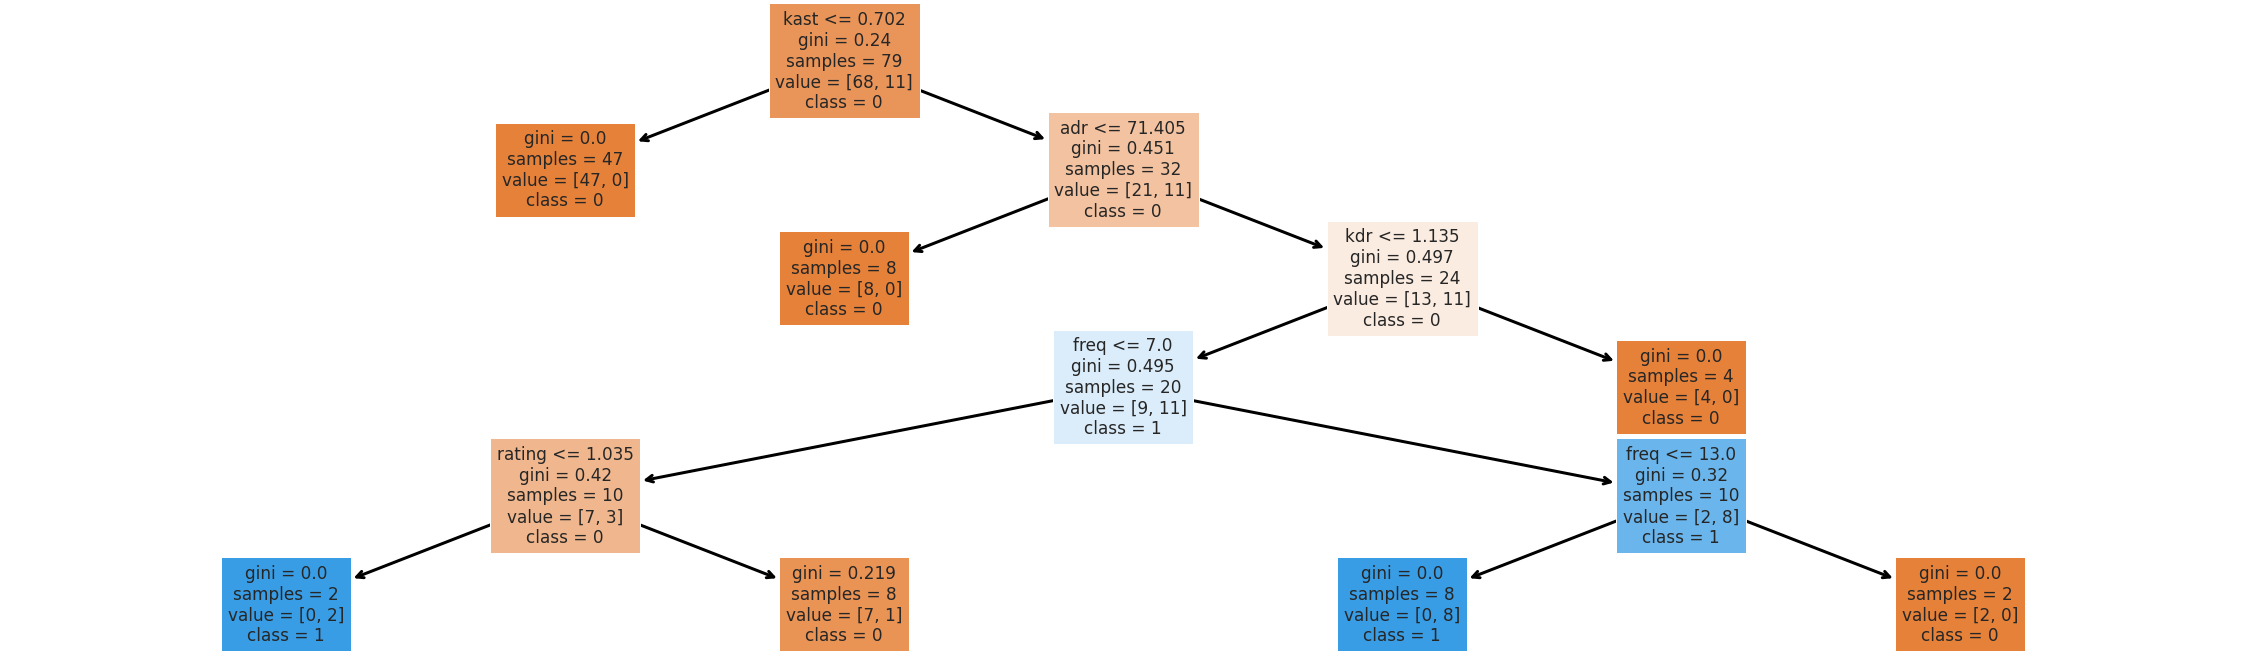

Gaussian Naives Bayes Classification Accuracy:
78.48 %
Gaussian Naives Bayes Prediction Accuracy:
80.0 %


     Training Confusion Matrix                       Prediction Confusion Matrix


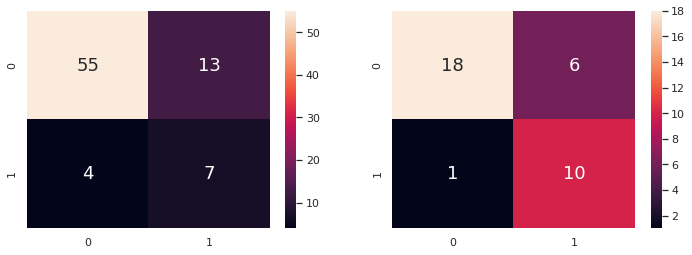

Random Forest Classification Accuracy:
98.73 %
Random Forest Prediction Accuracy:
68.57 %


     Training Confusion Matrix                       Prediction Confusion Matrix


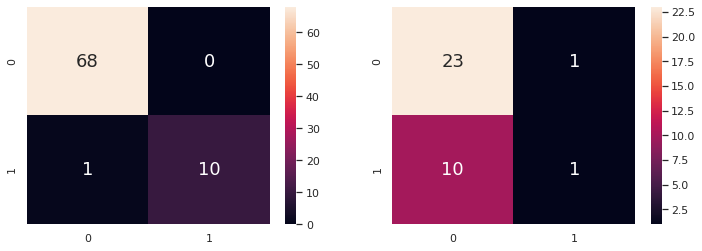

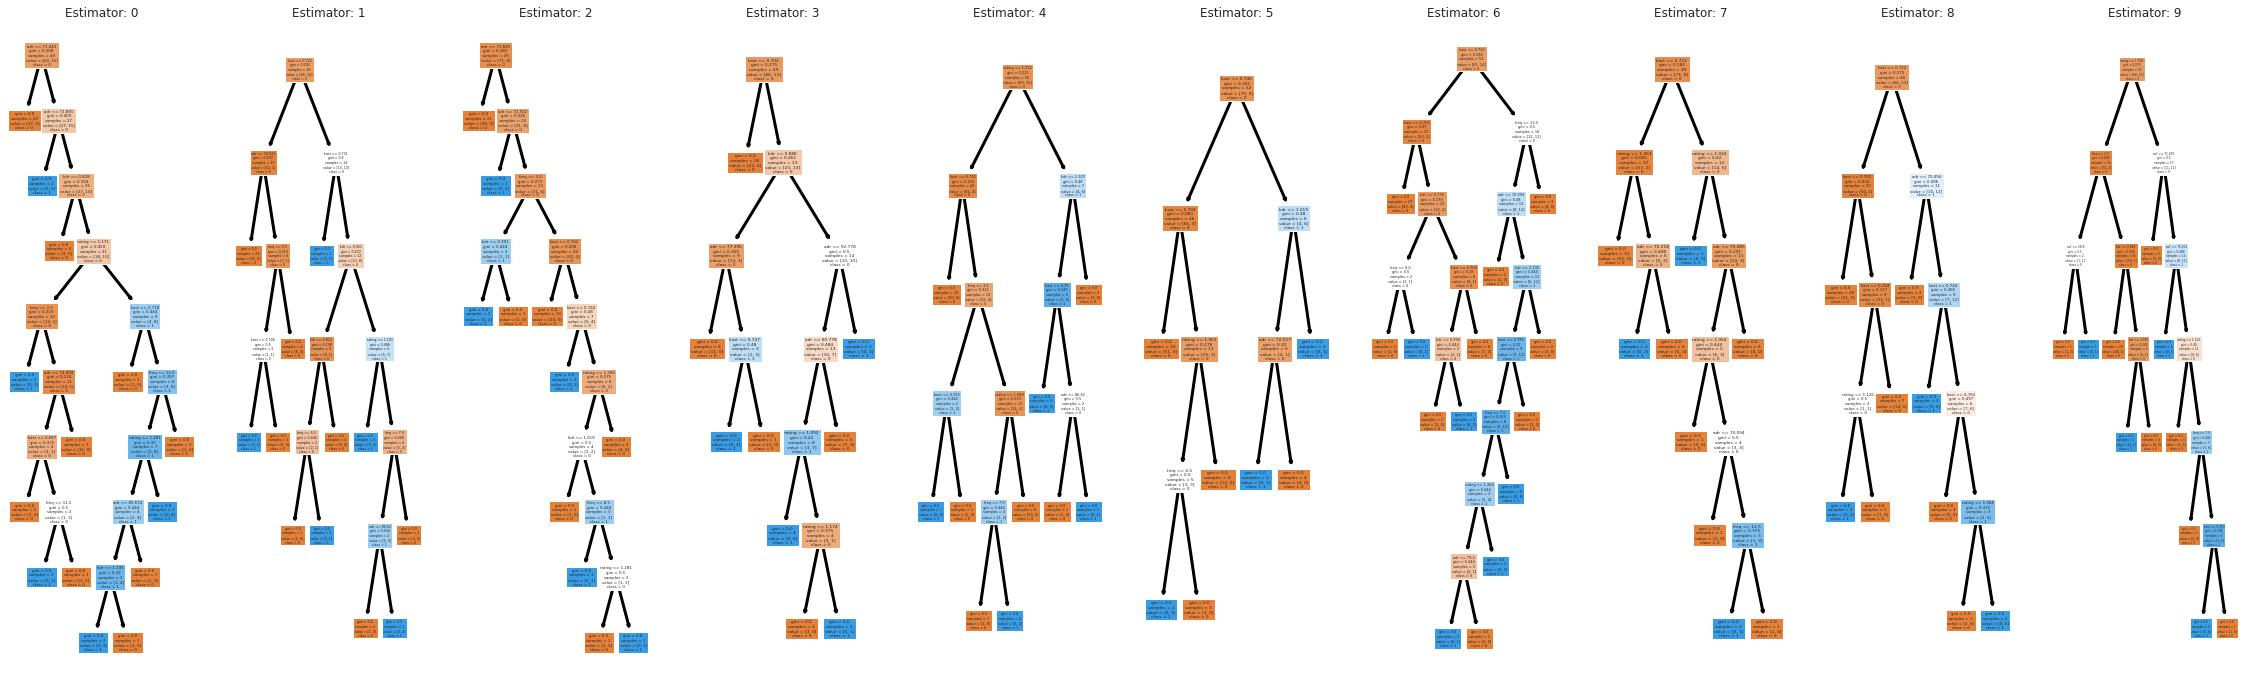




Random forest with k-fold validation of data
Accuracy of each fold:
0.917
0.833
0.833
0.917
0.909
0.909
0.909
0.818
0.455
0.818
Random Forest Using K-Fold validation mean Accuracy:
83.18 %
Standard Deviation of Accuracy
13.23 %
None


In [ ]:
print(classify(md88))

## Analysis using average values for 2019

---






Decision Tree Classification Accuracy:
99.0 %
Decision Tree Prediction Accuracy:
88.0 %


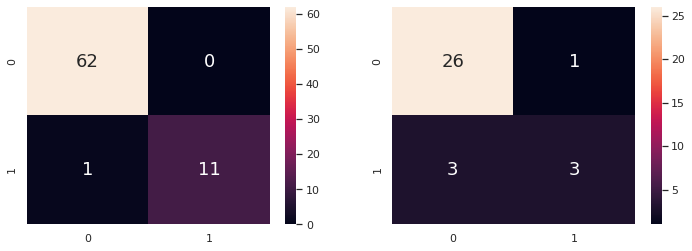

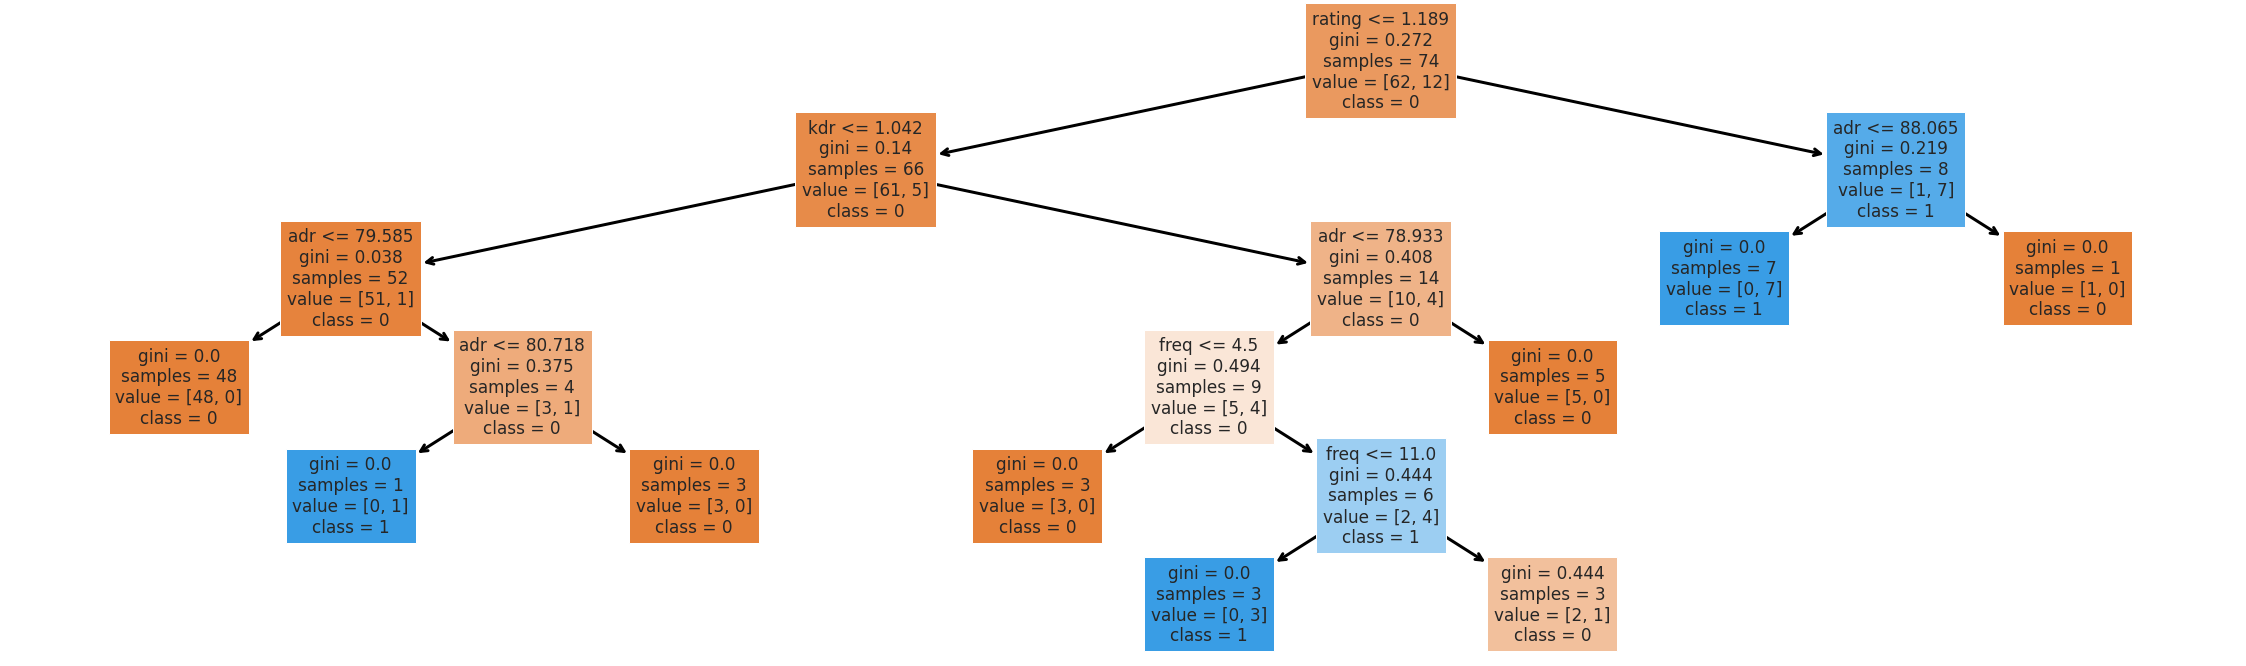

Gaussian Naives Bayes Classification Accuracy:
85.14 %
Gaussian Naives Bayes Prediction Accuracy:
81.82 %


     Training Confusion Matrix                       Prediction Confusion Matrix


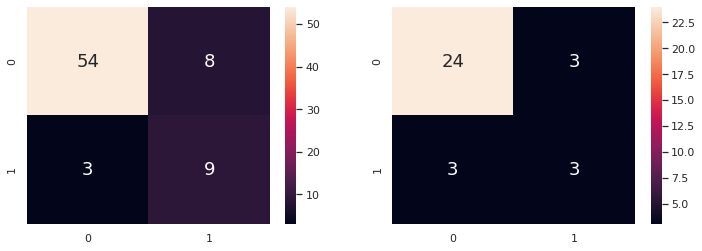

Random Forest Classification Accuracy:
98.65 %
Random Forest Prediction Accuracy:
87.88 %


     Training Confusion Matrix                       Prediction Confusion Matrix


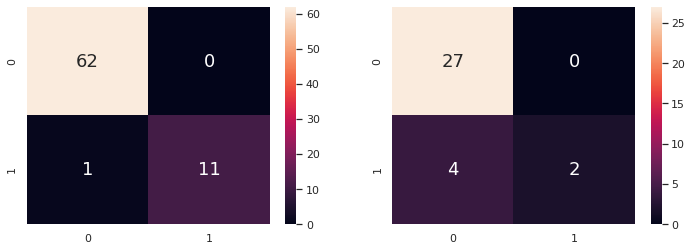

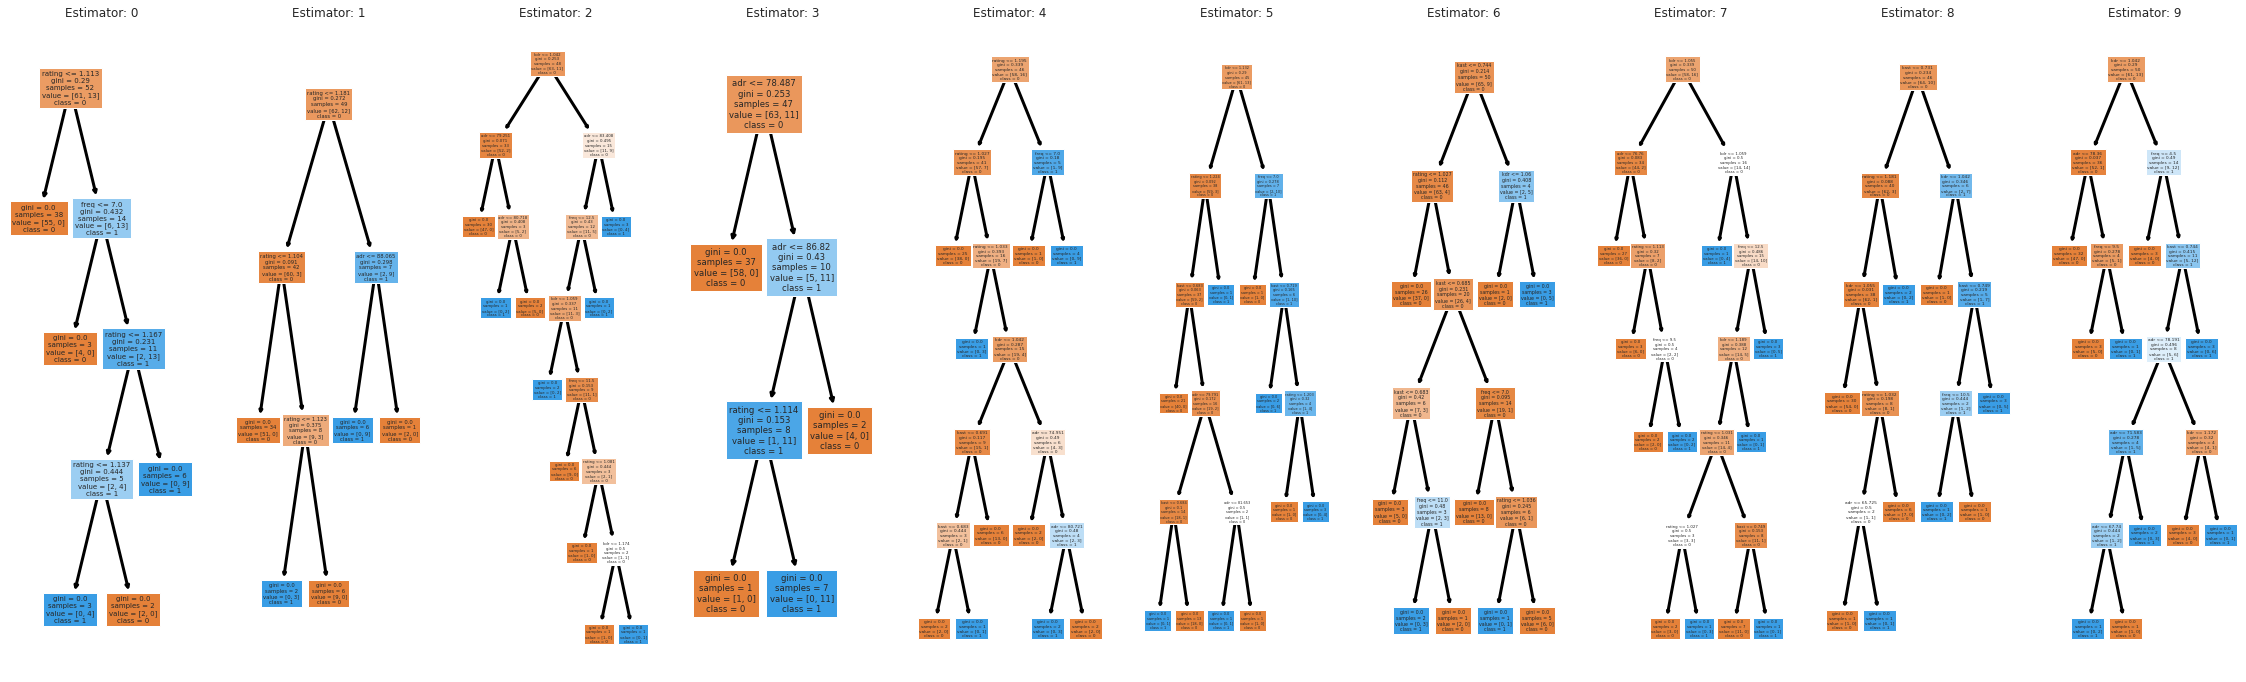




Random forest with k-fold validation of data
Accuracy of each fold:
0.818
0.909
0.818
0.818
0.909
0.727
0.818
0.8
0.9
0.8
Random Forest Using K-Fold validation mean Accuracy:
83.18 %
Standard Deviation of Accuracy
5.5 %
None


In [ ]:
print(classify(md99))

##Analysis using all matches for 2017-2019

---



In [ ]:
#print(classify(mdall))

# Data Visualization / Analysis

---



## Data Visualization Code

In [ ]:
#Violin plots including data points for comparing each variable between those in top 20 and not in top 20
def violin(df):
  fig = go.Figure()

  fig.add_trace(go.Violin(y0= 'kdr',
                          x=df['kdr'][df['isTop'] == 1 ],
                          legendgroup='Yes', scalegroup='Yes',name='In Top 20',
                          side='positive',
                          line_color='blue',
                          pointpos=1.2)
              )
  fig.add_trace(go.Violin(y0='kdr',
                          x=df['kdr'][df['isTop'] == 0 ],
                          legendgroup='No', scalegroup='No', name='Not in Top 20',
                          side='negative',
                          line_color='orange',
                          pointpos=-1.2)
              )
  fig.update_traces(meanline_visible=True,
                    points='all', # show all points
                    jitter=0.05,  # add some jitter on points for better visibility
                    scalemode='count') #scale violin plot area with total count
  fig.update_layout(autosize=False,
    width=500,
    height=300,
      
      violingap=0, violingroupgap=0, violinmode='overlay')
  fig.show()

  fig = go.Figure()

  fig.add_trace(go.Violin(y0= 'adr',
                          x=df['adr'][df['isTop'] == 1 ],
                          legendgroup='Yes', scalegroup='Yes',name='In Top 20',
                          side='positive',
                          line_color='blue',
                          pointpos=1.2)
              )
  fig.add_trace(go.Violin(y0='adr',
                          x=df['adr'][df['isTop'] == 0 ],
                          legendgroup='No', scalegroup='No', name='Not in Top 20',
                          side='negative',
                          line_color='orange',
                          pointpos=-1.2)
              )
  fig.update_traces(meanline_visible=True,
                    points='all', # show all points
                    jitter=0.05,  # add some jitter on points for better visibility
                    scalemode='count') #scale violin plot area with total count
  fig.update_layout(autosize=False,
    width=500,
    height=300,
      
      violingap=0, violingroupgap=0, violinmode='overlay')
  fig.show()

  fig = go.Figure()

  fig.add_trace(go.Violin(y0= 'kast',
                          x=df['kast'][df['isTop'] == 1 ],
                          legendgroup='Yes', scalegroup='Yes',name='In Top 20',
                          side='positive',
                          line_color='blue',
                          pointpos=1.2)
              )
  fig.add_trace(go.Violin(y0='kast',
                          x=df['kast'][df['isTop'] == 0 ],
                          legendgroup='No', scalegroup='No', name='Not in Top 20',
                          side='negative',
                          line_color='orange',
                          pointpos=-1.2)
              )
  fig.update_traces(meanline_visible=True,
                    points='all', # show all points
                    jitter=0.05,  # add some jitter on points for better visibility
                    scalemode='count') #scale violin plot area with total count
  fig.update_layout(autosize=False,
    width=500,
    height=300,
      
      violingap=0, violingroupgap=0, violinmode='overlay')
  fig.show()

  fig = go.Figure()

  fig.add_trace(go.Violin(y0= 'freq',
                          x=df['freq'][df['isTop'] == 1 ],
                          legendgroup='Yes', scalegroup='Yes',name='In Top 20',
                          side='positive',
                          line_color='blue',
                          pointpos=1.2)
              )
  fig.add_trace(go.Violin(y0='freq',
                          x=df['freq'][df['isTop'] == 0 ],
                          legendgroup='No', scalegroup='No', name='Not in Top 20',
                          side='negative',
                          line_color='orange',
                          pointpos=-1.2)
              )
  fig.update_traces(meanline_visible=True,
                    points='all', # show all points
                    jitter=0.05,  # add some jitter on points for better visibility
                    scalemode='count') #scale violin plot area with total count
  fig.update_layout(autosize=False,
    width=500,
    height=300,
      
      violingap=0, violingroupgap=0, violinmode='overlay')
  fig.show()

  fig = go.Figure()

  fig.add_trace(go.Violin(y0= 'rating',
                          x=df['rating'][df['isTop'] == 1 ],
                          legendgroup='Yes', scalegroup='Yes',name='In Top 20',
                          side='positive',
                          line_color='blue',
                          pointpos=1.2)
              )
  fig.add_trace(go.Violin(y0='rating',
                          x=df['rating'][df['isTop'] == 0 ],
                          legendgroup='No', scalegroup='No', name='Not in Top 20',
                          side='negative',
                          line_color='orange',
                          pointpos=-1.2)
              )
  fig.update_traces(meanline_visible=True,
                    points='all', # show all points
                    jitter=0.05,  # add some jitter on points for better visibility
                    scalemode='count') #scale violin plot area with total count
  fig.update_layout(autosize=False,
    width=500,
    height=300,
      
      violingap=0, violingroupgap=0, violinmode='overlay')
  fig.show()

## Visualization for all values and average for 2017

In [ ]:
print("Data including every single game for 2017:")
print("\n")
violin(md7)
print("\n\n")
print("Average Data for 2017:")
print("\n")
violin(md77)

Data including every single game for 2017:







Average Data for 2017:




##Visualization for all values and average for 2018

In [ ]:
print("Data including every single game for 2018:")
print("\n")
violin(md8)
print("\n\n")
print("Average Data for 2018:")
print("\n")
violin(md88)

Data including every single game for 2018:







Average Data for 2018:




##Visualization for all values and average for 2019

In [ ]:
print("Data including every single game for 2019:")
print("\n")
violin(md9)
print("\n\n")
print("Average Data for 2019:")
print("\n")
violin(md99)

Data including every single game for 2019:







Average Data for 2019:




##Visualization for every single match for 2017-2019

In [ ]:
print("Data including every game for 2017-2019")
violin(mdall)

Data including every game for 2017-2019


#SS

Part 2: Predict the player’s ratings for the following year


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd "drive/My Drive/EE0005 DSAI"

/content/drive/My Drive/EE0005 DSAI


In [ ]:
players_csv = pd.read_csv('players.csv')
playersData = pd.DataFrame(players_csv)
playersData.head()

,date,player_name,team,opponent,country,...,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,...,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,...,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,...,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,...,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,...,7.0,1.0,56.3,80.0,0.99


In [ ]:
playersData.columns.values

array(['date', 'player_name', 'team', 'opponent', 'country', 'player_id',
       'match_id', 'event_id', 'event_name', 'best_of', 'map_1', 'map_2',
       'map_3', 'kills', 'assists', 'deaths', 'hs', 'flash_assists',
       'kast', 'kddiff', 'adr', 'fkdiff', 'rating', 'm1_kills',
       'm1_assists', 'm1_deaths', 'm1_hs', 'm1_flash_assists', 'm1_kast',
       'm1_kddiff', 'm1_adr', 'm1_fkdiff', 'm1_rating', 'm2_kills',
       'm2_assists', 'm2_deaths', 'm2_hs', 'm2_flash_assists', 'm2_kast',
       'm2_kddiff', 'm2_adr', 'm2_fkdiff', 'm2_rating', 'm3_kills',
       'm3_assists', 'm3_deaths', 'm3_hs', 'm3_flash_assists', 'm3_kast',
       'm3_kddiff', 'm3_adr', 'm3_fkdiff', 'm3_rating', 'kills_ct',
       'deaths_ct', 'kddiff_ct', 'adr_ct', 'kast_ct', 'rating_ct',
       'kills_t', 'deaths_t', 'kddiff_t', 'adr_t', 'kast_t', 'rating_t',
       'm1_kills_ct', 'm1_deaths_ct', 'm1_kddiff_ct', 'm1_adr_ct',
       'm1_kast_ct', 'm1_rating_ct', 'm1_kills_t', 'm1_deaths_t',
       'm1_kddiff_t'

In [ ]:
# dataframe with only these 7 variables 
players = playersData[["date", "player_name", 
                       "kills", "deaths", "kast", "adr", "rating"]]
players.head()

,date,player_name,kills,deaths,kast,adr,rating
0,2020-02-26,Brehze,57,61,71.1,79.9,1.04
1,2020-02-26,CeRq,54,54,65.1,71.7,0.98
2,2020-02-26,EliGE,55,51,67.5,77.9,1.08
3,2020-02-26,Ethan,43,54,65.1,58.7,0.83
4,2020-02-26,NAF,52,46,77.1,75.9,1.08


In [ ]:
# create a kdr variable where kdr = kills/death (similar to previous part)
players["kdr"] = players["kills"] / players["deaths"]
players.head()

,date,player_name,kills,deaths,kast,adr,rating,kdr
0,2020-02-26,Brehze,57,61,71.1,79.9,1.04,0.934426
1,2020-02-26,CeRq,54,54,65.1,71.7,0.98,1.000000
2,2020-02-26,EliGE,55,51,67.5,77.9,1.08,1.078431
3,2020-02-26,Ethan,43,54,65.1,58.7,0.83,0.796296
4,2020-02-26,NAF,52,46,77.1,75.9,1.08,1.130435


In [ ]:
# get top 5 players to be used for analysis
playerNames2019top = list(top2019.head(5).player)
print(playerNames2019top)

['ZywOo', 's1mple', 'device', 'EliGE', 'Magisk']


In [ ]:
# new dataframe with only top 5 players
# remove rows with empty values
# remove kills and death columns as they are not needed anymore (replaced by kdr)
# index changed to date for time series analysis and sort by date
players2019top = players[players.player_name.isin(playerNames2019top)]\
                         .drop(columns=["kills", "deaths"]).dropna()\
                         .set_index("date").sort_index()
players2019top.head()

,player_name,kast,adr,rating,kdr
date,,,,,
2016-01-12,Magisk,67.9,97.3,1.18,1.051282
2016-01-12,Magisk,59.1,73.6,0.80,0.694444
2016-01-14,device,69.5,74.6,1.04,1.025641
2016-01-14,device,73.6,79.2,1.33,1.791667
2016-01-14,device,60.3,73.0,0.89,0.796296


In [ ]:
# create dictionary containing dataframes of every top 5 player
players2019top.groupby("player_name")
playersDfs = dict(tuple(players2019top.groupby("player_name")))

In [ ]:
# remove player_name column
for key in playersDfs:
  del playersDfs[key]["player_name"]

In [ ]:
# function for printing out all the dataframes in dictionary
def print_dictdfs(dictDfs):
  for key in dictDfs:
    print(key, "\n", dictDfs[key].head(), "\n")
    print(dictDfs[key].describe(), "\n\n\n")

print_dictdfs(playersDfs)

EliGE 
             kast    adr  rating       kdr
date                                     
2016-02-20  83.0   83.9    1.10  1.000000
2016-02-21  86.0   98.9    1.59  1.777778
2016-02-21  74.5   73.2    1.03  0.794872
2016-02-22  94.6  101.2    1.75  2.312500
2016-02-25  71.4   59.7    1.01  0.888889 

             kast         adr      rating         kdr
count  616.000000  616.000000  616.000000  616.000000
mean    71.773214   84.243994    1.191607    1.205748
std     10.912878   16.812311    0.312908    0.495495
min     16.700000   26.700000    0.160000    0.111111
25%     65.875000   73.575000    1.000000    0.894737
50%     72.400000   83.350000    1.170000    1.125000
75%     79.625000   93.800000    1.380000    1.400000
max    100.000000  173.400000    2.710000    3.857143 



Magisk 
             kast   adr  rating       kdr
date                                    
2016-01-12  67.9  97.3    1.18  1.051282
2016-01-12  59.1  73.6    0.80  0.694444
2016-01-19  75.9  81.9    1.12  1

In [ ]:
# function to apply given function to be used for all players
def all_players(dfList, fn):
  for key in dfList:
    print(key)
    fn(dfList[key])
    print("\n\n\n")

In [ ]:
# choose 1 player out of top 5 to be used for 
def time_dist(df):
  for i in range(2016, 2020):
    print("{}: {}".format(i, len(df.loc["{}-01-01".format(i):"{}-12-31".format(i)].index)))
  print("total:", len(df.index))

all_players(playersDfs, time_dist)

EliGE
2016: 139
2017: 178
2018: 175
2019: 118
total: 616




Magisk
2016: 189
2017: 155
2018: 177
2019: 86
total: 611




ZywOo
2016: 3
2017: 87
2018: 84
2019: 147
total: 327




device
2016: 164
2017: 147
2018: 181
2019: 86
total: 582




s1mple
2016: 94
2017: 131
2018: 153
2019: 73
total: 462






Choose player "Magisk"/"device" because the count for the test year (2019) is approx half of every train year (2016-2018), giving a train test ratio of 2:1 to 6:1

For this project, we shall use player "device"

In [ ]:
player_data = playersDfs["device"]
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 2016-01-14 to 2020-02-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kast    582 non-null    float64
 1   adr     582 non-null    float64
 2   rating  582 non-null    float64
 3   kdr     582 non-null    float64
dtypes: float64(4)
memory usage: 42.7+ KB


Time series requirements:
1.   Data to be at equal time intervals
2.   Autocorrelation needs to be significant for time dependent data

Multivariate time series models:
1.   Multivariate Autoregressive Integrated Moving Average (MARIMA)
2.   Vector Autoregressive (VAR)
3.   Long Short-term Memory



In [ ]:
import statsmodels.api as sm #####
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib import style
import statsmodels.graphics.tsaplots as smt
from pandas.plotting import autocorrelation_plot
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.api import VAR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



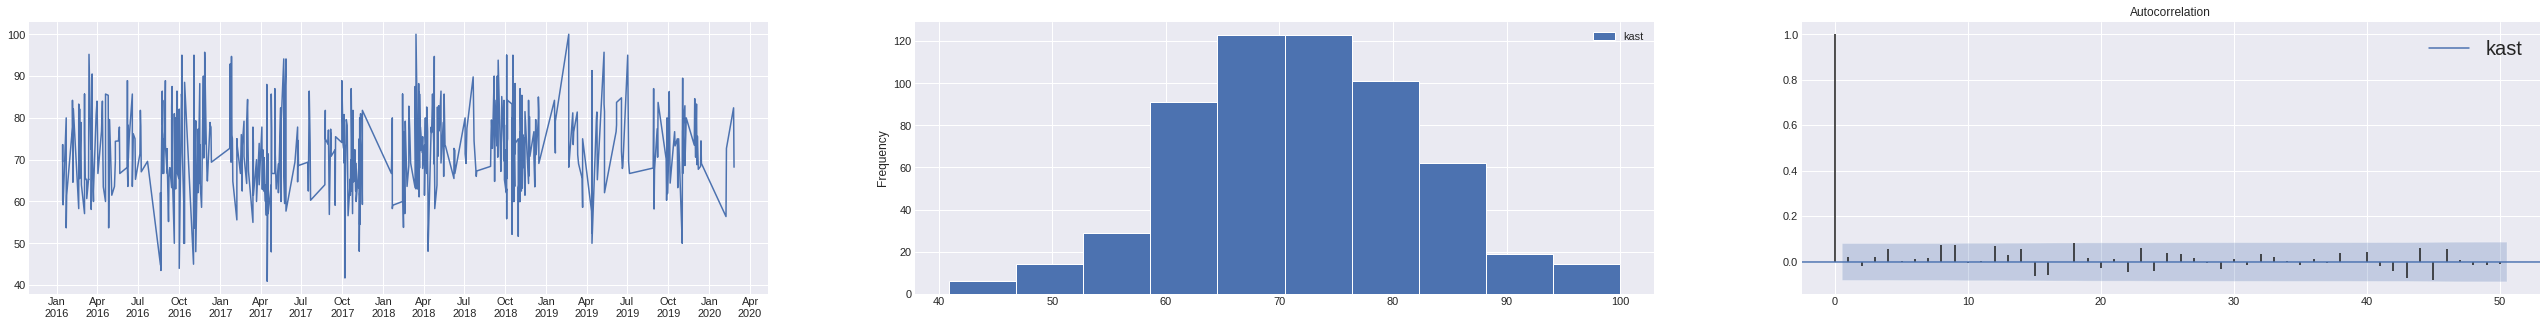

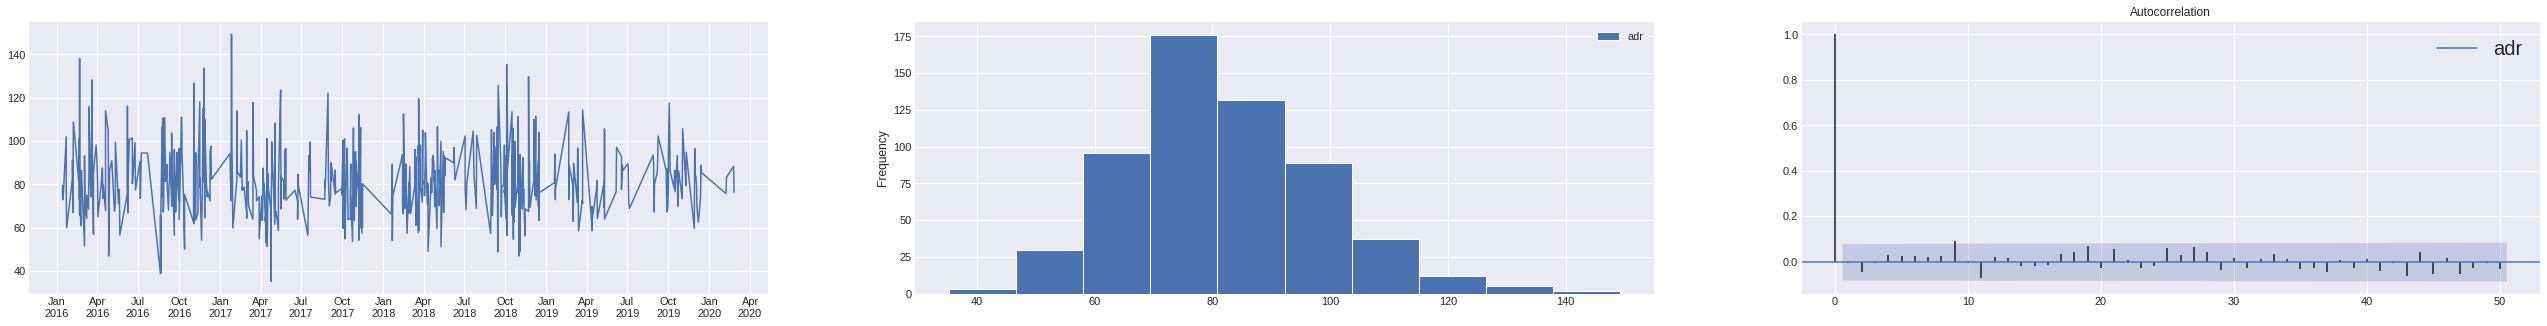

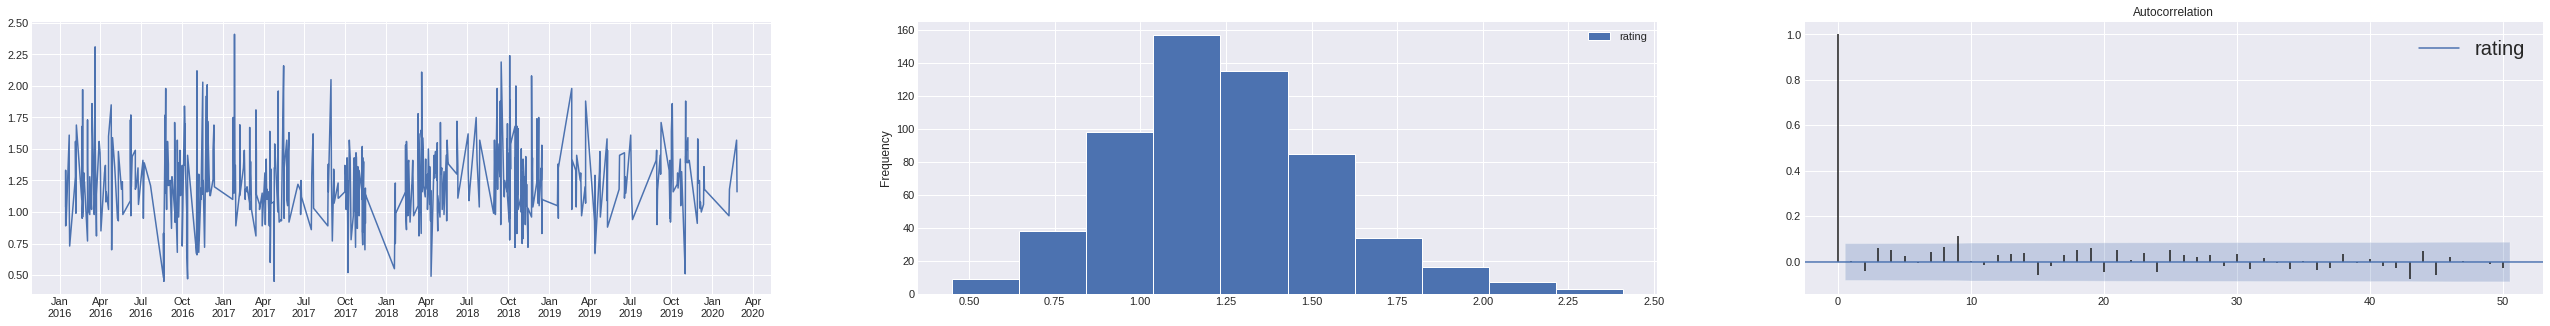

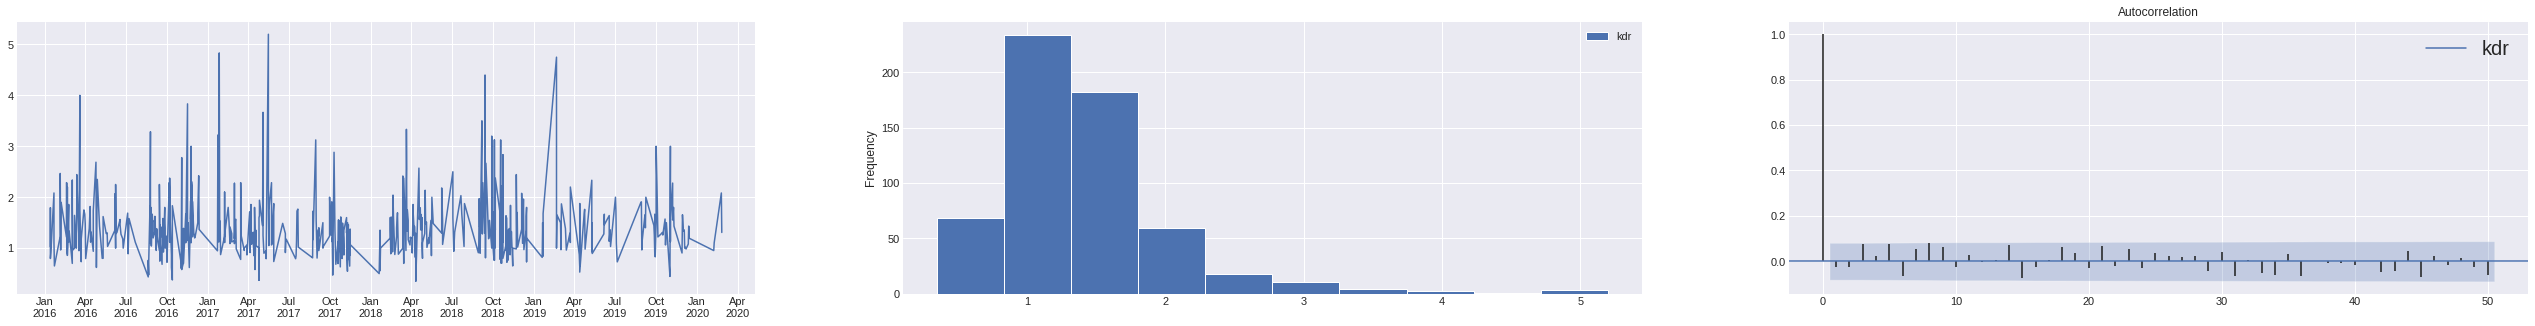

In [ ]:
style.use("seaborn-darkgrid")

# run chart, histogram, autocorrelation plot for all variables
def plot_stats(df_in):
  for col in df_in:
    df = df_in[[col]]
    fig, ax = plt.subplots(figsize=(45, 5))
    layout = (1,3)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (0, 2))
    
    ts_ax.plot_date(pd.to_datetime(df.index), df, linestyle="-", marker="None")
    ts_ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ts_ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
    df.plot(ax=hist_ax, kind="hist")#, bin=25)
    smt.plot_acf(df, ax=acf_ax, marker="None", lags=50)
    plt.legend(df.columns, prop={'size': 20})
    plt.show()

#all_players(playersDfs, plot_stats)
plot_stats(player_data)

In [ ]:
#check if there are indeed time periods where no matches are played
player_data.loc["2017-11-01":"2018-02-01"]

,kast,adr,rating,kdr
date,,,,
2017-11-01,63.8,69.8,0.97,0.864865
2017-11-01,60.0,90.7,1.33,1.350000
2017-11-07,68.2,73.6,1.17,1.600000
2017-11-07,63.2,54.2,1.10,1.300000
2017-11-08,75.0,112.2,1.52,1.500000
2017-11-08,67.6,64.9,0.94,0.954545
2017-11-08,64.3,71.0,0.90,0.952381
2017-11-08,48.1,65.1,0.85,0.800000
2017-11-09,62.1,59.5,0.74,0.545455


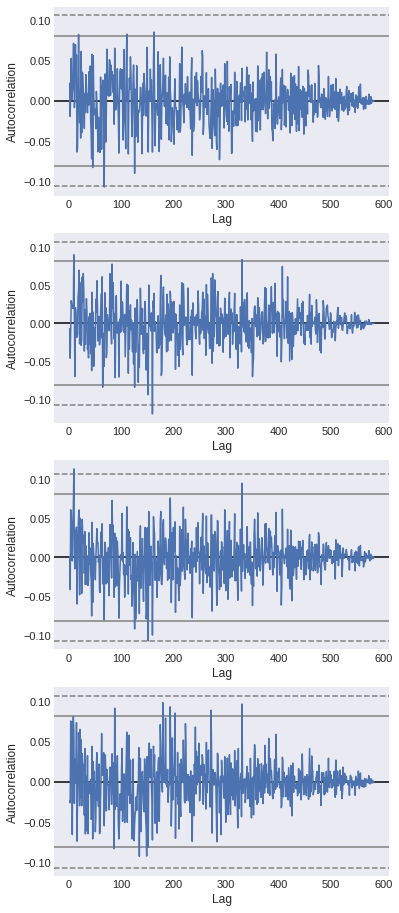

In [ ]:
# autocorrelation plot from another pandas library just to confirm
def plot_acf(df):
  fig, ax = plt.subplots(figsize=(6, 16))
  layout = (4,1)
  for i, col in enumerate(df.columns):
    autocorrelation_plot(df[[col]], ax=plt.subplot2grid(layout, (i, 0)))

plot_acf(player_data)

Analysis:
1.   
Since there are periods where "device" did not play any matches, the data does not have equal time intervals.
2.   
From the autocorrelation plots, there aren't enough lags with significant autocorrelations to indicate the variables have autocorrelation. Therefore the data is not time dependent.

As such, there isn't a need to use time series models and we shall proceed to use multivariate regression for this set of data

We will use Scikit's Linear Regression and Tensorflow's Estimator DNNRegressor for multivariate regression

We will compare the performances of both models afterwards

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

tf.get_logger().setLevel('WARNING')

To keep things simple, we shall only use the 2017-2018 matches for our training datasets

Test dataset will be kept consistent using the 2019 matches

In [ ]:
# split dataset into x y train test
def split_traintest(df, start_train, end_train, start_test, end_test):
  y_data = df[["rating"]]
  x_data = df.drop(columns=["rating"])

  x_train = x_data.loc[start_train:end_train]
  y_train = y_data.loc[start_train:end_train]
  x_test = x_data.loc[start_test:end_test]
  y_test = y_data.loc[start_test:end_test]

  return x_train, y_train, x_test, y_test

# train dataset only using 2017 matches
x_train17, y_train17, x_test, y_test = split_traintest(\
            player_data, "2017-01-01", "2017-12-31", "2019-01-01", "2019-12-31")
# train dataset only using 2018 matches
x_train18, y_train18, x_test, y_test = split_traintest(\
            player_data, "2018-01-01", "2018-12-31", "2019-01-01", "2019-12-31")
# train dataset using both 2017 & 2018 matches
x_train1718, y_train1718, x_test, y_test = split_traintest(\
            player_data, "2017-01-01", "2018-12-31", "2019-01-01", "2019-12-31")

In [ ]:
print("x_train17:\n", x_train17.describe())
print("\ny_train17:\n", y_train17.describe())
print("\n\nx_train18:\n", x_train18.describe())
print("\ny_train18:\n", y_train18.describe())
print("\n\nx_train1718:\n", x_train1718.describe())
print("\ny_train1718:\n", y_train1718.describe())
print("\n\nx_test:\n", x_test.describe())
print("\ny_test:\n", y_test.describe())

x_train17:
              kast         adr         kdr
count  147.000000  147.000000  147.000000
mean    69.965986   79.115646    1.342407
std      9.720142   16.378694    0.663611
min     40.900000   35.200000    0.368421
25%     63.250000   68.300000    0.954545
50%     69.400000   77.700000    1.200000
75%     75.700000   86.600000    1.515625
max     94.700000  149.300000    5.200000

y_train17:
            rating
count  147.000000
mean     1.185714
std      0.298556
min      0.450000
25%      1.010000
50%      1.160000
75%      1.355000
max      2.410000


x_train18:
              kast         adr         kdr
count  181.000000  181.000000  181.000000
mean    73.027072   82.487845    1.451204
std      9.521635   16.036024    0.596563
min     48.100000   46.900000    0.347826
25%     66.000000   71.800000    1.020833
50%     73.100000   80.800000    1.357143
75%     80.000000   93.100000    1.666667
max    100.000000  135.300000    4.400000

y_train18:
            rating
count  181.0

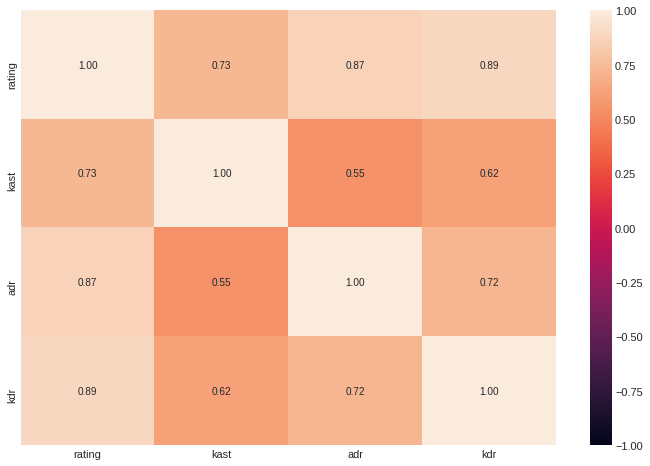

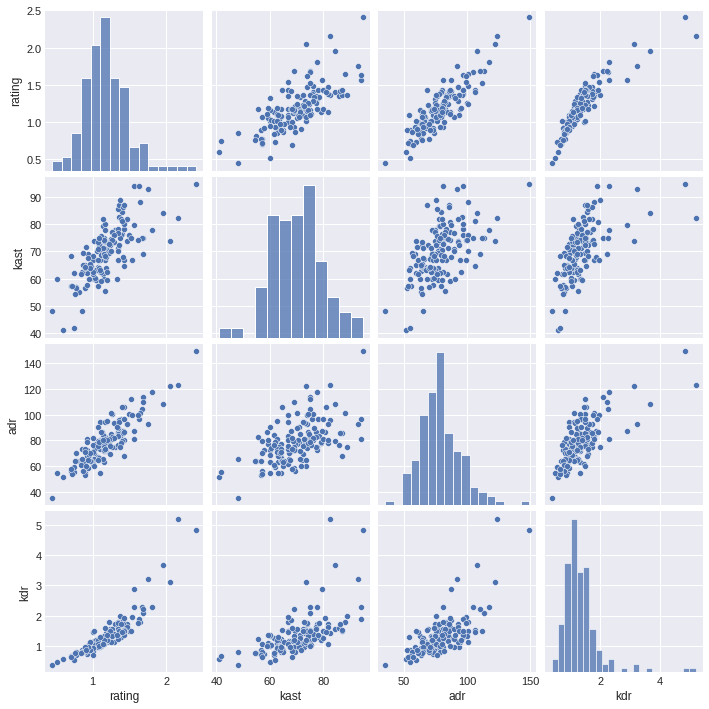

In [ ]:
# visualisation of training data
def plot_corrheat(x_train, y_train):
  trainDF = pd.concat([y_train, x_train], axis = 1)
  f, axes = plt.subplots(1, 1, figsize=(12, 8))
  sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
  sb.pairplot(data = trainDF)

plot_corrheat(x_train17, y_train17)

Model using Tensorflow's Estimator DNNRegressor 

To keep things simple, we will set the following hyperparameters:


1.   Batch size = 10
2.   Number of epochs = 100
3.   Number of hidden layers = 2
4.   Number of neurons/nodes = test_size / 5 * ( inputs (3) + output (1))
5.   Training steps = 1000



118

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you inte

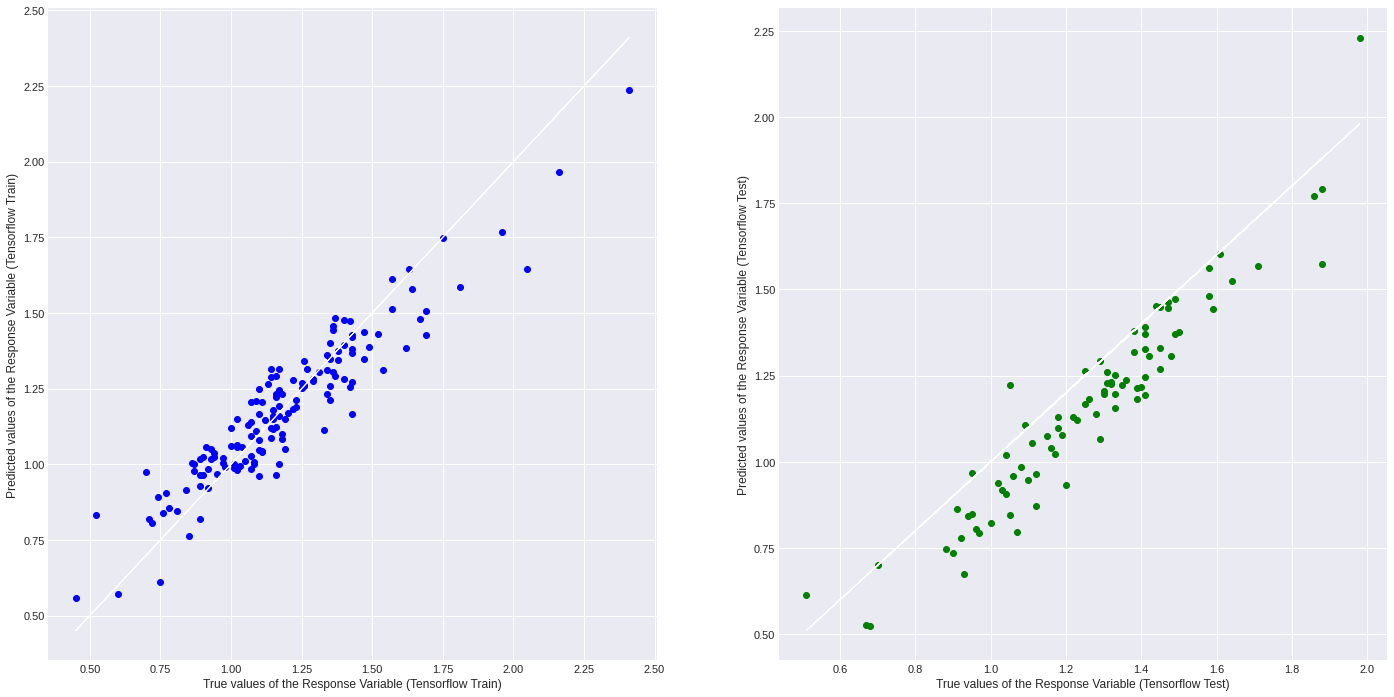


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

train: {'average

In [ ]:
import math
def tfDNN(x_train, y_train, x_test, y_test):
  y_train_tf = y_train["rating"] # has to be a series, not dataframe as in [["rating"]], for dnn
  y_test_tf = y_test["rating"]
  scaler_model = MinMaxScaler()
  scaler_model.fit(x_train)

  x_train = pd.DataFrame(scaler_model.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
  x_test = pd.DataFrame(scaler_model.fit_transform(x_test), columns=x_test.columns, index=x_test.index)

  # Creating Feature Columns
  feat_cols=[]
  for cols in player_data.columns:
    if cols != "rating":
      column=tf.feature_column.numeric_column(cols)
      feat_cols.append(column)
  #print(feat_cols)

  # DNN Regressor model
  nodes = math.ceil(len(x_train.index) / 5 * (3 + 1))
  print(nodes)
  tf_model = tf.estimator.DNNRegressor([nodes, nodes], feature_columns=feat_cols)

  # Input function
  input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x_train, y_train_tf, batch_size=10, num_epochs=100, shuffle=True)

  # Train the model
  tf_model.train(input_func, steps=1000)

  # Predict the model
  pred_input_train = tf.compat.v1.estimator.inputs.pandas_input_fn(x_train, y_train_tf, batch_size=10, num_epochs=1, shuffle=False)
  preds_train_tf = tf_model.predict(pred_input_train)
  predictions_train = list(preds_train_tf)

  train_pred_tf = []
  for pred in predictions_train:
      train_pred_tf.append(pred["predictions"])

  pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x_test, y_test_tf, batch_size=10, num_epochs=1, shuffle=False)
  preds = tf_model.predict(pred_input_func)
  predictions = list(preds)

  test_pred_tf = []
  for pred in predictions:
      test_pred_tf.append(pred["predictions"])

  # Plot the Predictions vs the True values
  f, axes = plt.subplots(1, 2, figsize=(24, 12))
  axes[0].scatter(y_train, train_pred_tf, color = "blue")
  axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
  axes[0].set_xlabel("True values of the Response Variable (Tensorflow Train)")
  axes[0].set_ylabel("Predicted values of the Response Variable (Tensorflow Train)")
  axes[1].scatter(y_test_tf, test_pred_tf, color = "green")
  axes[1].plot(y_test_tf, y_test_tf, 'w-', linewidth = 1)
  axes[1].set_xlabel("True values of the Response Variable (Tensorflow Test)")
  axes[1].set_ylabel("Predicted values of the Response Variable (Tensorflow Test)")
  plt.show()

  #Evaluating the model
  train_metrics = tf_model.evaluate(input_func, steps=1000)
  pred_metrics = tf_model.evaluate(pred_input_func, steps=1000)
  print("train:", train_metrics)
  print("pred:", pred_metrics)

  return tf_model, train_pred_tf, test_pred_tf

model17_tf, trainpred17_tf, testpred17_tf = tfDNN(x_train17, y_train17, x_test, y_test)

Intercept of Regression 	: b =  [-0.15100325]
Coefficients of Regression 	: a =  [[0.00635588 0.00776588 0.2068069 ]]



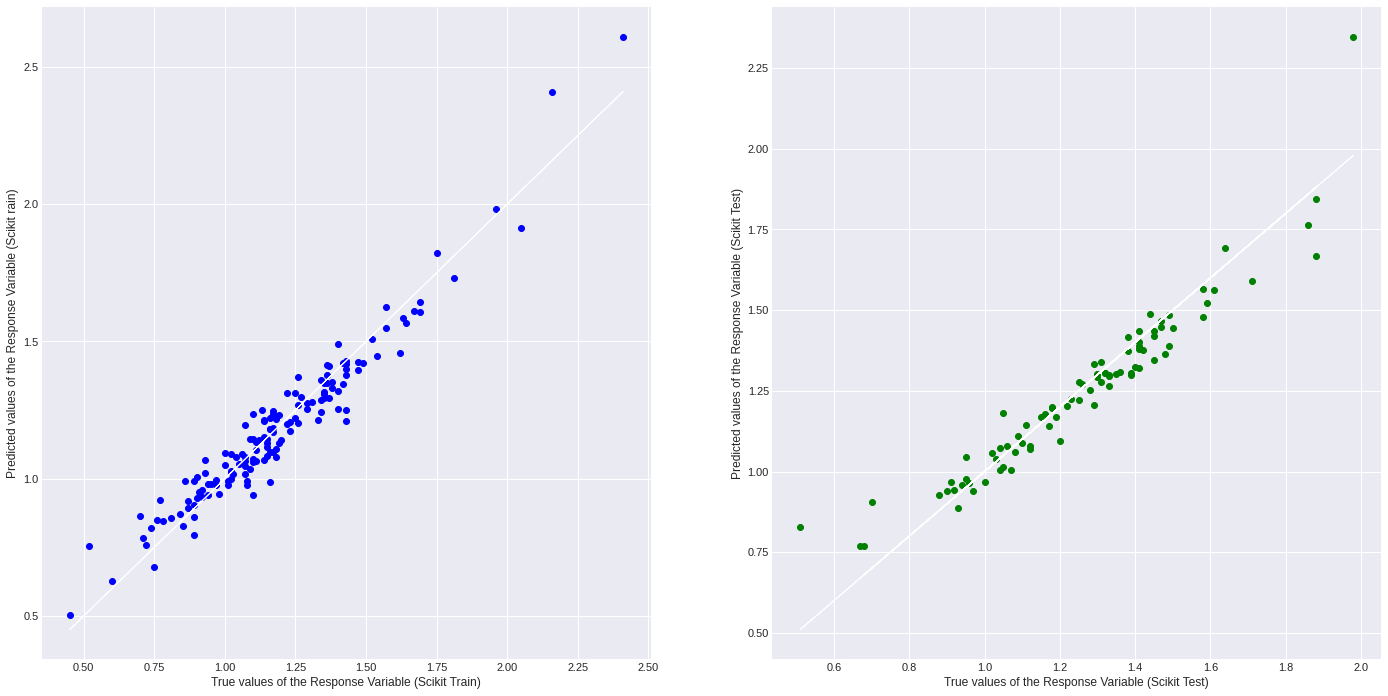

Goodness of Fit of Model 		Train Dataset
Explained Variance (R^2) 		: 0.9328032315672543
Goodness of Fit of Model 		Test Dataset
Explained Variance (R^2) 		: 0.9135717375802578


In [ ]:
from sklearn.linear_model import LinearRegression

def SciKit(x_train, y_train, x_test, y_test):
  # Linear Regression using Train Data
  linreg = LinearRegression()         # create the linear regression object
  linreg.fit(x_train, y_train)        # train the linear regression model

  # Coefficients of the Linear Regression line
  print('Intercept of Regression \t: b = ', linreg.intercept_)
  print('Coefficients of Regression \t: a = ', linreg.coef_)
  print()

  # Print the Coefficients against Predictors
  pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

  y_train_pred = linreg.predict(x_train)
  y_test_pred = linreg.predict(x_test)

  # Plot the Predictions vs the True values
  f, axes = plt.subplots(1, 2, figsize=(24, 12))
  axes[0].scatter(y_train, y_train_pred, color = "blue")
  axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
  axes[0].set_xlabel("True values of the Response Variable (Scikit Train)")
  axes[0].set_ylabel("Predicted values of the Response Variable (Scikit rain)")
  axes[1].scatter(y_test, y_test_pred, color = "green")
  axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
  axes[1].set_xlabel("True values of the Response Variable (Scikit Test)")
  axes[1].set_ylabel("Predicted values of the Response Variable (Scikit Test)")
  plt.show()

  
  print("Goodness of Fit of Model \t\tTrain Dataset")
  print("Explained Variance (R^2) \t\t:", linreg.score(x_train, y_train))

  
  print("Goodness of Fit of Model \t\tTest Dataset")
  print("Explained Variance (R^2) \t\t:", linreg.score(x_test, y_test))

  return linreg, y_train_pred, y_test_pred

model17_scikit, trainpred17_scikit, testpred17_scikit = SciKit(x_train17, y_train17, x_test, y_test)

In [ ]:
def compare_models(x_train, y_train, x_test, y_test, trainpred_tf, trainpred_scikit, testpred_tf, testpred_scikit):
  y_train_tf = y_train["rating"]
  y_test_tf = y_test["rating"]

  # Check the Goodness of Fit (on Train Data)
  print("Mean Squared Error (MSE) Scikit\t\t:", mean_squared_error(y_train, trainpred_scikit))
  print("Mean Squared Error (MSE) Tensorflow DNN\t:", mean_squared_error(y_train_tf, trainpred_tf))
  print()

  # Check the Goodness of Fit (on Test Data)
  print("Mean Squared Error (MSE) Scikit\t\t:", mean_squared_error(y_test, testpred_scikit))
  print("Mean Squared Error (MSE) Tensorflow DNN\t:", mean_squared_error(y_test_tf, testpred_tf))
  print()

compare_models(x_train17, y_train17, x_test, y_test, trainpred17_tf, trainpred17_scikit, testpred17_tf, testpred17_scikit)

Mean Squared Error (MSE) Scikit		: 0.005948879626054872
Mean Squared Error (MSE) Tensorflow DNN	: 0.012069922841977757

Mean Squared Error (MSE) Scikit		: 0.006465366902004604
Mean Squared Error (MSE) Tensorflow DNN	: 0.01782302744970043



145

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you inte

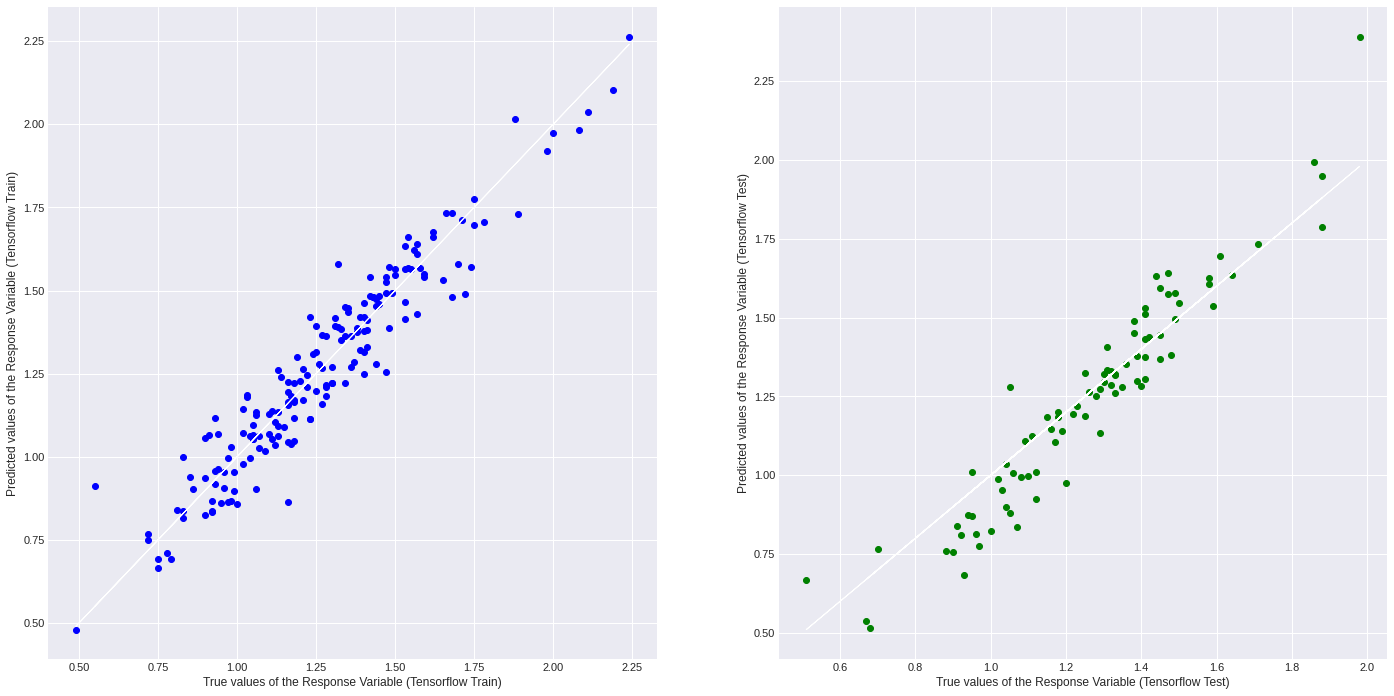


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

train: {'average

In [ ]:
model18_tf, trainpred18_tf, testpred18_tf = tfDNN(x_train18, y_train18, x_test, y_test)

Intercept of Regression 	: b =  [-0.22556854]
Coefficients of Regression 	: a =  [[0.00569455 0.00917137 0.22247368]]



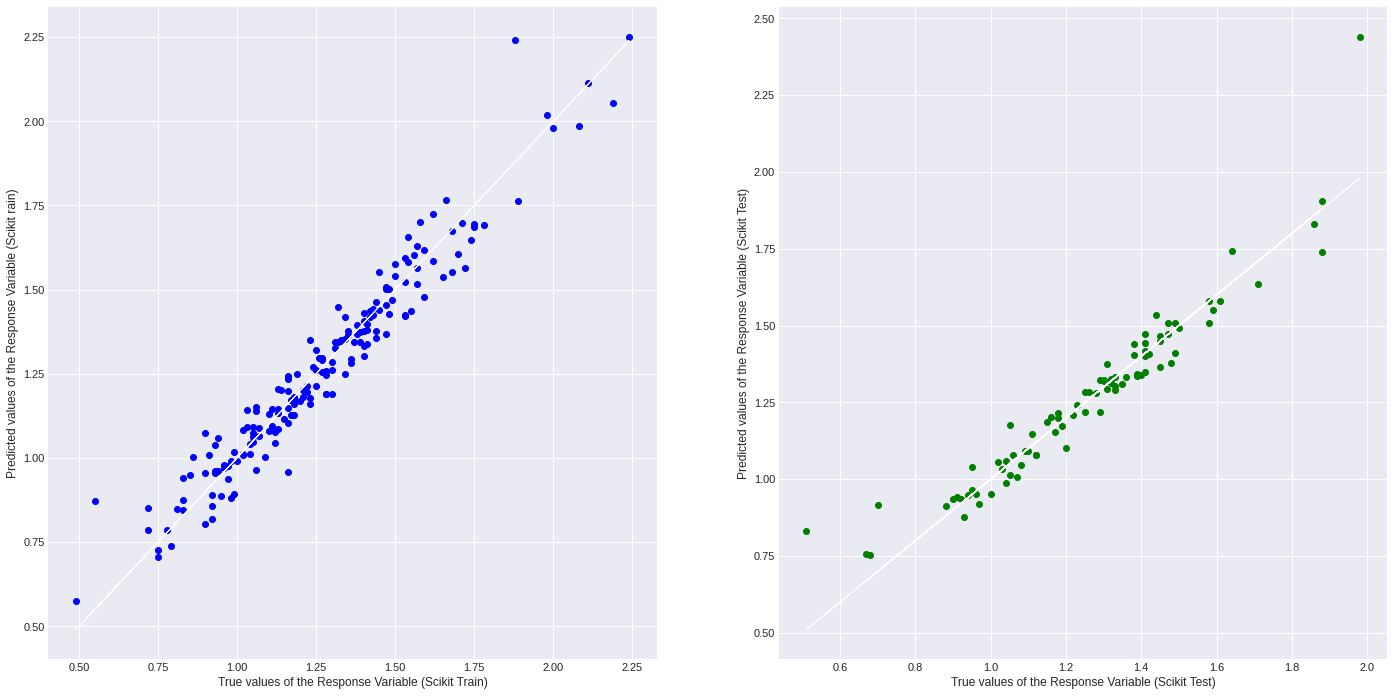

Goodness of Fit of Model 		Train Dataset
Explained Variance (R^2) 		: 0.9400233160449408
Goodness of Fit of Model 		Test Dataset
Explained Variance (R^2) 		: 0.9125028191711534


In [ ]:
model18_scikit, trainpred18_scikit, testpred18_scikit = SciKit(x_train18, y_train18, x_test, y_test)

In [ ]:
compare_models(x_train18, y_train18, x_test, y_test, trainpred18_tf, trainpred18_scikit, testpred18_tf, testpred18_scikit)

Mean Squared Error (MSE) Scikit		: 0.005603406232654252
Mean Squared Error (MSE) Tensorflow DNN	: 0.008455766644847134

Mean Squared Error (MSE) Scikit		: 0.00654532858941658
Mean Squared Error (MSE) Tensorflow DNN	: 0.012309819065030937



263

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you inte

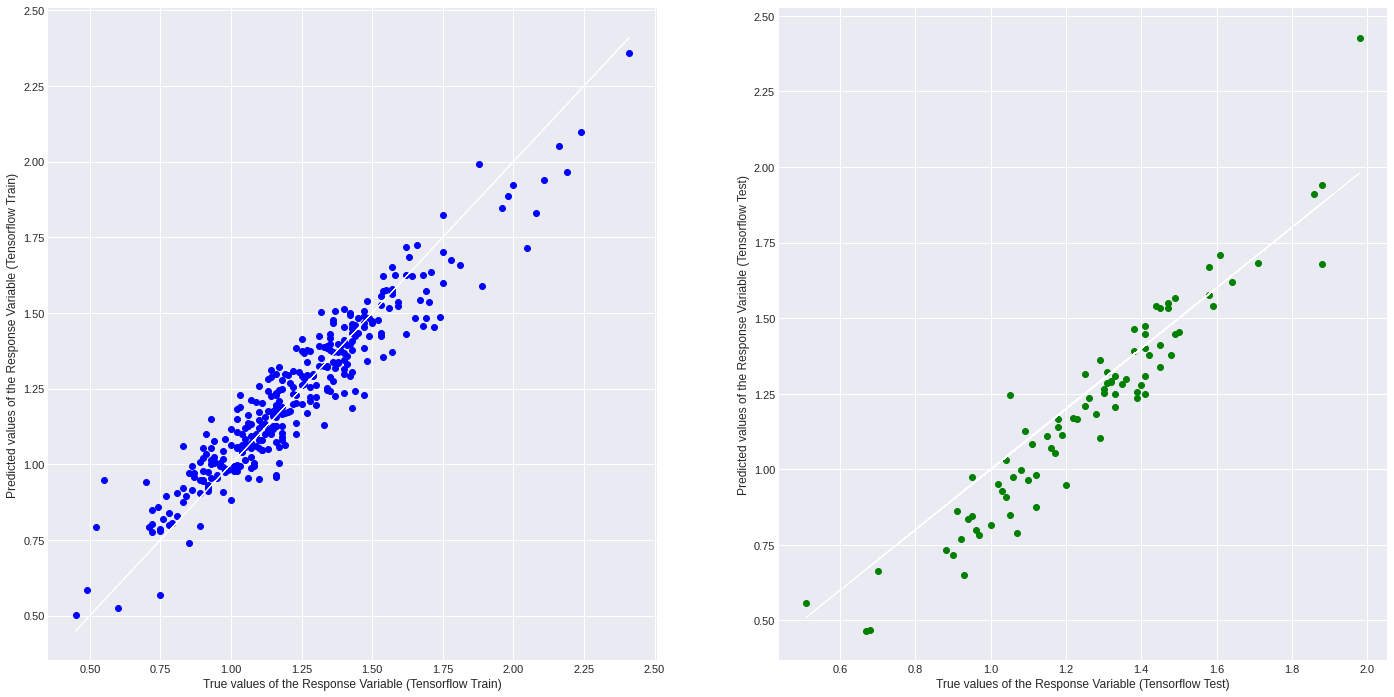


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

train: {'average

In [ ]:
model1718_tf, trainpred1718_tf, testpred1718_tf = tfDNN(x_train1718, y_train1718, x_test, y_test)

Intercept of Regression 	: b =  [-0.20483777]
Coefficients of Regression 	: a =  [[0.00619946 0.00859402 0.21158985]]



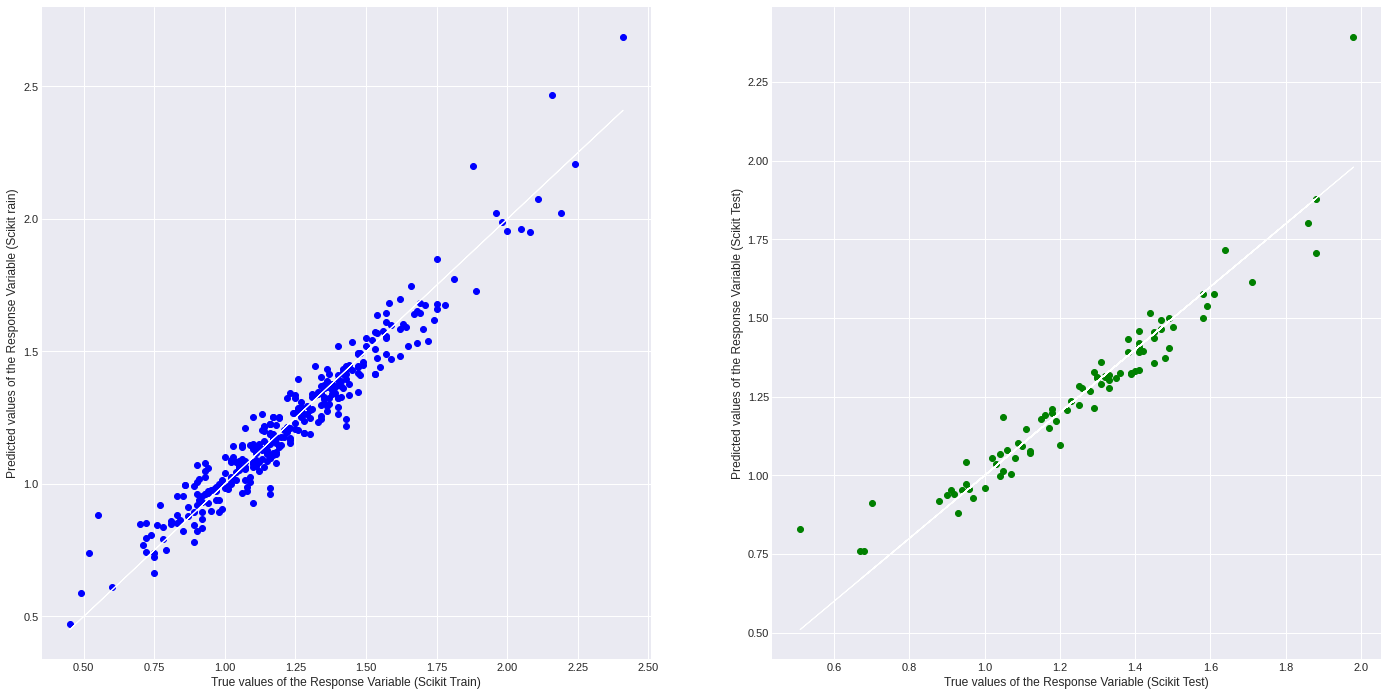

Goodness of Fit of Model 		Train Dataset
Explained Variance (R^2) 		: 0.9356666057446118
Goodness of Fit of Model 		Test Dataset
Explained Variance (R^2) 		: 0.9160795035445709


In [ ]:
model1718_scikit, trainpred1718_scikit, testpred1718_scikit = SciKit(x_train1718, y_train1718, x_test, y_test)

In [ ]:
compare_models(x_train1718, y_train1718, x_test, y_test, trainpred1718_tf, trainpred1718_scikit, testpred1718_tf, testpred1718_scikit)

Mean Squared Error (MSE) Scikit		: 0.005981383876279061
Mean Squared Error (MSE) Tensorflow DNN	: 0.00995012552865703

Mean Squared Error (MSE) Scikit		: 0.006277770546255813
Mean Squared Error (MSE) Tensorflow DNN	: 0.015108965388998238

